In [5]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [6]:
import itertools
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 16
import numpy as np
import pandas as pd
import requests
import seaborn as sns

import covid19

## data

In [57]:
deaths_path = 'time_series_covid19_deaths_US.csv'
deaths_path = covid19.data.download('deaths', repo='usa')
confirmed_path = 'time_series_covid19_deaths_US.csv'
confirmed_path = covid19.data.download('confirmed', repo='usa')
deaths_path, confirmed_path

('time_series_covid19_deaths_US.csv', 'time_series_covid19_confirmed_US.csv')

In [58]:
ds_counties = covid19.data.read_jhu_usa(deaths_path)
ds_counties['confirmed'] = covid19.data.read_jhu_usa(confirmed_path)['confirmed']
ds_counties['mortality'] = ds_counties['deaths'] / ds_counties['population'] * 1_000_000
ds_counties['daily_deaths'] = ds_counties['deaths'].diff('time')
ds_counties['daily_mortality'] = ds_counties['daily_deaths'] / ds_counties['population'] * 1_000_000
ds_counties['daily_mortality7'] = ds_counties['daily_mortality'].rolling({'time': 7}).mean()
ds_counties['daily_confirmed'] = ds_counties['confirmed'].diff('time')
ds_counties['daily_prevalence'] = ds_counties['daily_confirmed'] / ds_counties['population'] * 1_000_000
ds_counties['daily_prevalence7'] = ds_counties['daily_prevalence'].rolling({'time': 7}).mean()

ds_counties = ds_counties.fillna(0)
ds_counties

<xarray.Dataset>
Dimensions:            (location: 3340, time: 326)
Coordinates:
  * time               (time) datetime64[ns] 2020-01-22 ... 2020-12-12
    state_region       (location) <U29 'US / Alabama' ... 'US / Wyoming'
    country            (location) <U2 'US' 'US' 'US' 'US' ... 'US' 'US' 'US'
    lat                (location) float64 32.54 30.73 31.87 ... 0.0 43.9 43.84
    lon                (location) float64 -86.64 -87.72 -85.39 ... -107.7 -104.6
  * location           (location) <U57 'US / Alabama / Autauga' ... 'US / Wyoming / Weston'
Data variables:
    population         (location) int64 55869 223234 24686 22394 ... 0 7805 6927
    deaths             (time, location) int64 0 0 0 0 0 0 0 ... 5 14 2 7 0 11 2
    confirmed          (time, location) int64 0 0 0 0 0 ... 1886 1289 0 629 428
    mortality          (time, location) float64 0.0 0.0 0.0 ... 1.409e+03 288.7
    daily_deaths       (time, location) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    daily_mortality    (time, location) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    daily_mortality7   (time, location) float64 0.0 0.0 0.0 ... 0.0 54.91 0.0
    daily_confirmed    (time, location) float64 0.0 0.0 0.0 0.0 ... 0.0 9.0 0.0
    daily_prevalence   (time, location) float64 0.0 0.0 0.0 ... 1.153e+03 0.0
    daily_prevalence7  (time, location) float64 0.0 0.0 0.0 ... 1.995e+03 185.6

In [59]:
tmp = ds_counties.sortby(-ds_counties['daily_mortality7'].isel(time=-1)).isel(time=-1)
tmp.sel(location=tmp['population'] > 100_000).to_dataframe().head(20)

population  deaths  confirmed    mortality  \
location                                                                     
US / Colorado / Pueblo              168424     212      11353  1258.727972   
US / Pennsylvania / Cambria         130192     141       6888  1083.015854   
US / Texas / Potter                 117415     259      14174  2205.851041   
US / South Dakota / Pennington      113775     112       9943   984.399033   
US / Iowa / Black Hawk              131228     184      11802  1402.139787   
US / Massachusetts / Berkshire      124944      97       2228   776.347804   
US / Pennsylvania / Blair           121829     109       6031   894.696665   
US / Michigan / Bay                 103126     141       5409  1367.259469   
US / Illinois / LaSalle             108669     176       7364  1619.597125   
US / Illinois / Rock Island         141879     198       9805  1395.555368   
US / Michigan / Saginaw             190539     311      10736  1632.211778   
US / Florida / Highlands            106221     181       4261  1703.994502   
US / Texas / Wichita                132230     169       8574  1278.076080   
US / Iowa / Linn                    226706     215      15419   948.364843   
US / Illinois / Madison             262966     325      17482  1235.901219   
US / Texas / Lubbock                310569     457      35977  1471.492647   
US / Pennsylvania / Franklin        155027     160       6419  1032.078283   
US / Pennsylvania / Cumberland      253370     212       7383   836.721001   
US / Pennsylvania / Butler          187853     123       6320   654.767291   
US / Texas / El Paso                839238    1350      92584  1608.602089   

                                daily_deaths  daily_mortality  \
location                                                        
US / Colorado / Pueblo                   1.0         5.937396   
US / Pennsylvania / Cambria              8.0        61.447708   
US / Texas / Potter                      0.0         0.000000   
US / South Dakota / Pennington           5.0        43.946385   
US / Iowa / Black Hawk                   1.0         7.620325   
US / Massachusetts / Berkshire           2.0        16.007171   
US / Pennsylvania / Blair                9.0        73.874037   
US / Michigan / Bay                      8.0        77.575005   
US / Illinois / LaSalle                  7.0        64.415795   
US / Illinois / Rock Island              6.0        42.289557   
US / Michigan / Saginaw                  6.0        31.489616   
US / Florida / Highlands                 1.0         9.414334   
US / Texas / Wichita                     2.0        15.125161   
US / Iowa / Linn                         1.0         4.410999   
US / Illinois / Madison                  9.0        34.224957   
US / Texas / Lubbock                    11.0        35.418860   
US / Pennsylvania / Franklin             2.0        12.900979   
US / Pennsylvania / Cumberland           5.0        19.733986   
US / Pennsylvania / Butler               6.0        31.939868   
US / Texas / El Paso                    33.0        39.321384   

                                daily_mortality7  daily_confirmed  \
location                                                            
US / Colorado / Pueblo                 49.195568            164.0   
US / Pennsylvania / Cambria            44.988501            179.0   
US / Texas / Potter                    40.150626              0.0   
US / South Dakota / Pennington         35.157108            126.0   
US / Iowa / Black Hawk                 34.835771             55.0   
US / Massachusetts / Berkshire         33.157712             30.0   
US / Pennsylvania / Blair              32.832905            223.0   
US / Michigan / Bay                    30.475895             32.0   
US / Illinois / LaSalle                30.235985             90.0   
US / Illinois / Rock Island            30.206826             43.0   
US / Michigan / Saginaw                29.240358        

In [60]:
ds_states = ds_counties.groupby('state_region').sum().rename({'state_region': 'location'})
ds_states['mortality'] = ds_states['deaths'] / ds_states['population'] * 1_000_000
ds_states['daily_mortality'] = ds_states['daily_deaths'] / ds_states['population'] * 1_000_000
ds_states['daily_mortality7'] = ds_states['daily_mortality'].rolling({'time': 7}).mean()
ds_states['daily_prevalence'] = ds_states['daily_confirmed'] / ds_states['population'] * 1_000_000
ds_states['daily_prevalence7'] = ds_states['daily_prevalence'].rolling({'time': 7}).mean()
tmp = ds_states.isel(time=-1).copy()
tmp = tmp.sortby(-tmp['daily_prevalence7'])
STATES = list(tmp.location.values)
tmp.to_dataframe().head(50)

time  population  deaths  confirmed  \
location                                                              
US / Rhode Island         2020-12-12     1059361    1509      70818   
US / Ohio                 2020-12-12    11689100    7477     553461   
US / North Dakota         2020-12-12      762062    1152      87590   
US / Tennessee            2020-12-12     6829174    5400     442953   
US / Indiana              2020-12-12     6732219    6758     419536   
US / Idaho                2020-12-12     1787065    1169     120632   
US / Arizona              2020-12-12     7278717    7322     402589   
US / Nevada               2020-12-12     3080156    2520     183949   
US / Delaware             2020-12-12      973764     815      44876   
US / Utah                 2020-12-12     3205958    1038     231821   
US / Kansas               2020-12-12     2913314    2072     188460   
US / Alaska               2020-12-12      731545     176      40497   
US / South Dakota         2020-12-12      884659    1243      90407   
US / New Mexico           2020-12-12     2096829    1913     118358   
US / Pennsylvania         2020-12-12    12801989   12371     485330   
US / California           2020-12-12    39512223   20958    1549176   
US / Connecticut          2020-12-12     3565287    5363     146761   
US / Minnesota            2020-12-12     5639632    4418     375398   
US / Montana              2020-12-12     1068778     816      72644   
US / Alabama              2020-12-12     4903185    4102     292841   
US / Wyoming              2020-12-12      578759     321      38907   
US / Oklahoma             2020-12-12     3956971    2042     233336   
US / Kentucky             2020-12-12     4467673    2192     220659   
US / Arkansas             2020-12-12     3017804    2911     184252   
US / Colorado             2020-12-12     5758736    3871     285634   
US / Massachusetts        2020-12-12     6892503   11307     285725   
US / Illinois             2020-12-12    12671821   15231     841688   
US / Mississippi          2020-12-12     2976149    4180     177947   
US / Wisconsin            2020-12-12     5822434    4324     465991   
US / West Virginia        2020-12-12     1792147     966      62151   
US / Nebraska             2020-12-12     1934408    1365     147688   
US / New Hampshire        2020-12-12     1359711     600      30244   
US / North Carolina       2020-12-12    10488084    5796     429776   
US / New Jersey           2020-12-12     8882190   17732     396496   
US / Michigan             2020-12-12     9986857   11195     465159   
US / South Carolina       2020-12-12     5148714    4685     248798   
US / Missouri             2020-12-12     6626371    4602     350388   
US / Iowa                 2020-12-12     3155070    3208     255009   
US / Louisiana            2020-12-12     4648794    6767     264191   
US / Georgia              2020-12-12    10617423   10075     538040   
US / New York             2020-12-12    19453561   35441     764966   
US / Maryland             2020-12-12     6045680    5100     232009   
US / Virginia             2020-12-12     8535519    4409     278615   
US / Washington           2020-12-12     7614893    2879     199735   
US / Florida              2020-12-12    21477737   19785    1116973   
US / Texas                2020-12-12    28995881   24347    1400728   
US / District of Columbia 2020-12-12      705749     713      24643   
US / Oregon               2020-12-12     4217737    1150      92839   
US / Maine                2020-12-12     1344212     257      15620   
US / Puerto Rico          2020-12-12     3754939    1266      61723   

                             mortality  daily_deaths  daily_mortality  \
location                                                                
US / Rhode Island          1424.443603           0.0         0.000000   
US / Ohio                   639.655748          51.0         4.363039   
US / North Dakota          1511.688025         

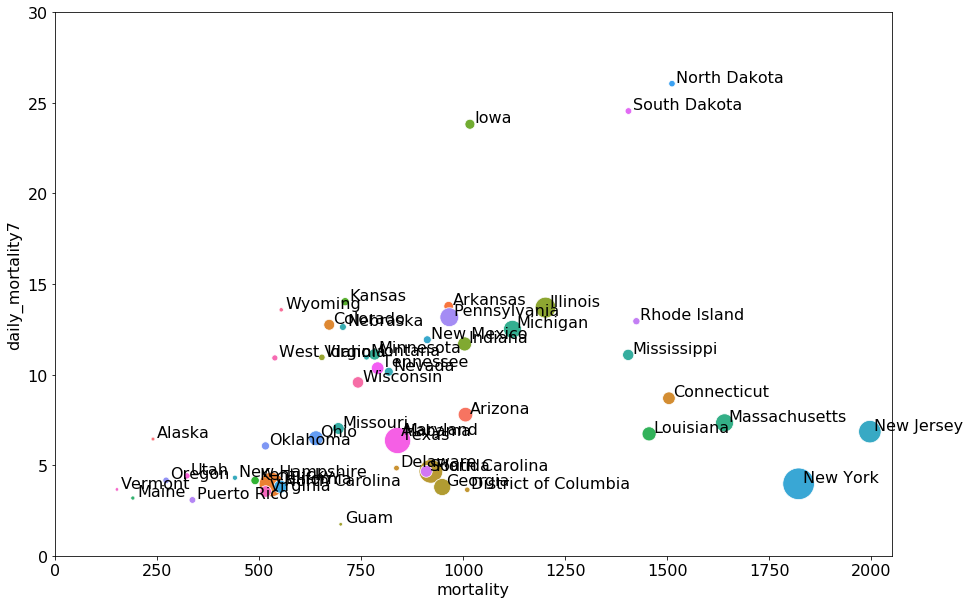

In [61]:
# sns.set()

world_hit = ds_states.sel(location=(((ds_states['daily_mortality7'].isel(time=-1) > 2.) | (ds_states['mortality'].isel(time=-1) > 400)) & (ds_states['deaths'] > 0)).any('time')).isel(time=slice(-100, None)).to_dataframe().reset_index()
# ax = sns.scatterplot(x="mortality", y="daily_mortality7", hue="location", size="deaths", data=world_hit, alpha=0.2, sizes=(10, 1_000), legend=False)
ax = sns.scatterplot(x="mortality", y="daily_mortality7", hue="location", size="deaths", data=world_hit[world_hit['time']==world_hit['time'].max()], sizes=(10, 1_000), legend=False)
_ = ax.set(ylim=(0, 30), xlim=(0, 2050))
for index in world_hit[world_hit['time']==world_hit['time'].max()].index:
    record = world_hit.loc[index]
    ax.annotate(record['location'].partition('US / ')[2], (record['mortality'] + 10, record['daily_mortality7'] + .1))

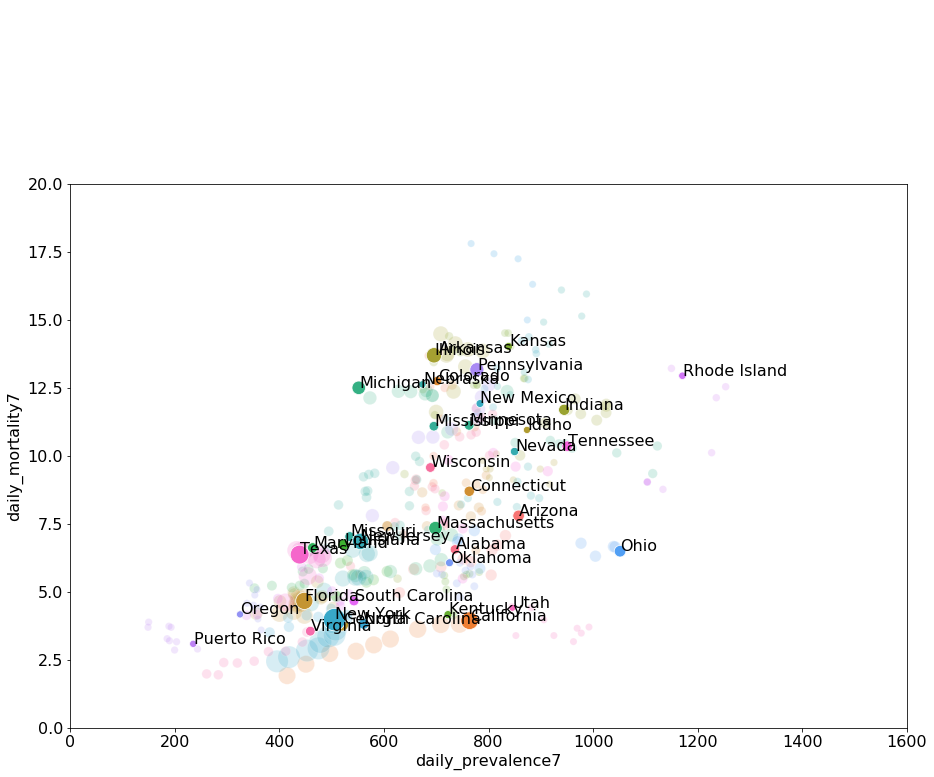

In [62]:
world_hit = ds_states.sel(location=(((ds_states['daily_mortality7'].isel(time=-1) > 1.) & (ds_states['mortality'] > 0).any('time')) & (ds_states['deaths'] > 1_000)).any('time')).isel(time=slice(-10, None)).to_dataframe().reset_index()
ax = sns.scatterplot(x="daily_prevalence7", y="daily_mortality7", hue="location", size="deaths", data=world_hit, alpha=0.2, sizes=(50, 500), legend=False)
ax = sns.scatterplot(x="daily_prevalence7", y="daily_mortality7", hue="location", size="deaths", data=world_hit[world_hit['time']==world_hit['time'].max()], sizes=(50, 500), legend=False)
_ = ax.set(ylim=(0, 20), xlim=(0, 1600))
for index in world_hit[world_hit['time']==world_hit['time'].max()].index:
    record = world_hit.loc[index]
    ax.annotate(record['location'].partition('US / ')[2], (record['daily_prevalence7'] + 1, record['daily_mortality7'] + .01))

In [63]:
#### DAY = np.timedelta64(24 * 60 * 60, 's')
PALETTE_ONE = list(sns.color_palette())


EXTENT = ('2020-03-12', '2020-12-31')
XLIM = tuple(map(np.datetime64, EXTENT))

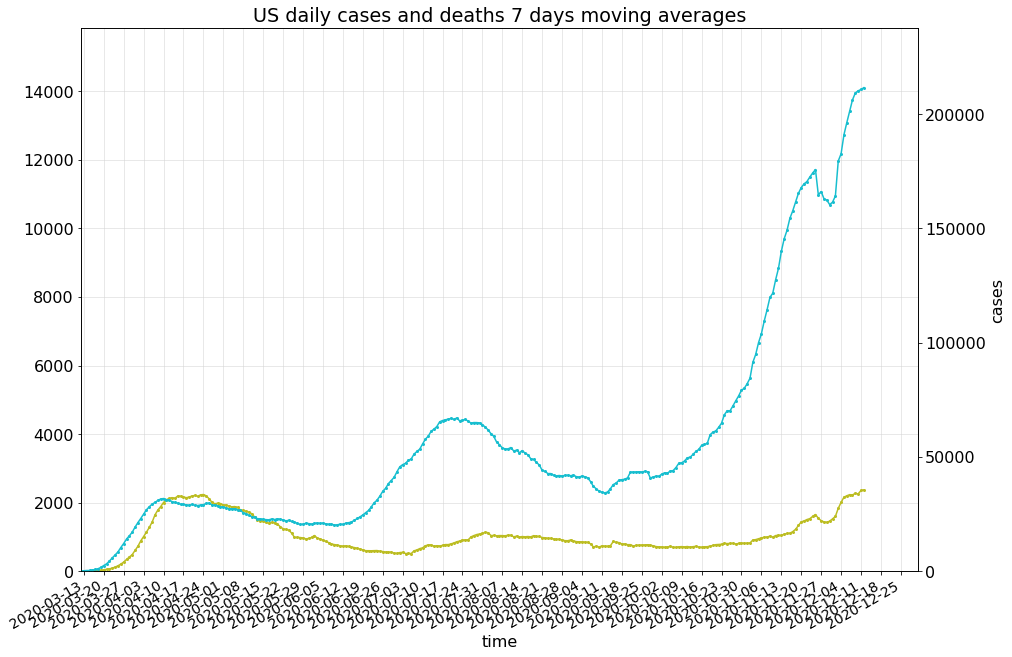

In [64]:
_, ax1 = covid19.plot.subplots(subplot_kw={'xlim': XLIM})
ax1.set(title=f'COVID-19 USA - Linear scale')
ax2 = ax1.twinx()

usa = ds_states.sum('location')

covid19.plot.plot_data(ax1, usa['daily_deaths'].rolling({'time': 7}).mean())
covid19.plot.plot_data(ax2, usa['daily_confirmed'].rolling({'time': 7}).mean())

ax1.set(ylim=(0, usa['population'] / 15 / 1_400), title='US daily cases and deaths 7 days moving averages') 
_ = ax2.set(ylim=(0, usa['population'] / 1_400), ylabel='cases') 


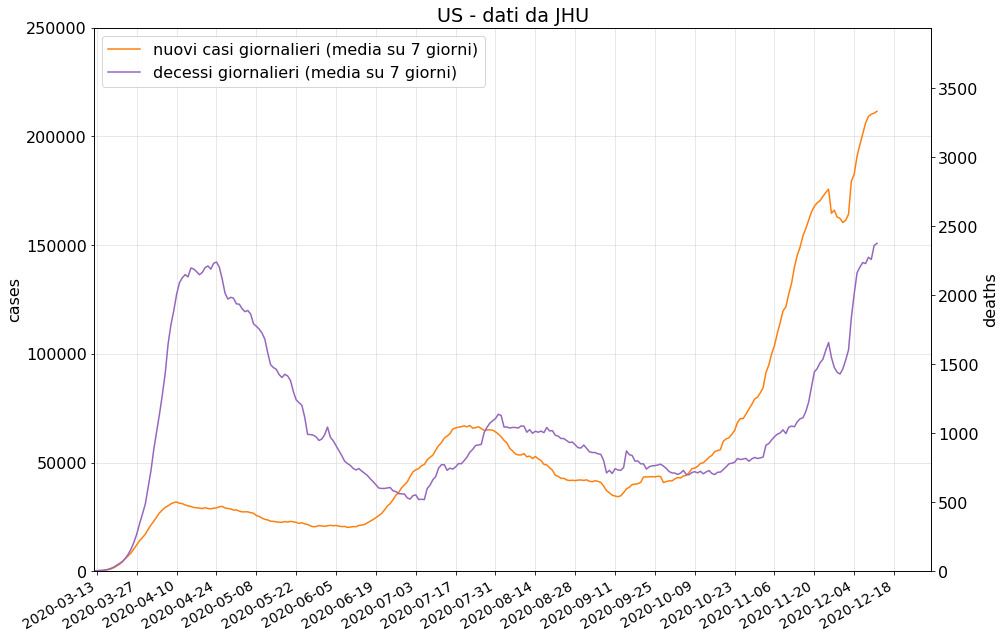

In [65]:
fig, ax1 = covid19.plot.subplots(subplot_kw={'xlim': tuple(map(np.datetime64, ('2020-03-12', '2020-12-31')))})
ax2 = ax1.twinx()

usa = ds_states.sum('location')

ax2.plot([0], [0], '-', color='tab:orange', label='nuovi casi giornalieri (media su 7 giorni)')
covid19.plot.plot_data(ax2, usa['daily_deaths'].rolling({'time': 7}).mean(), color='tab:purple', marker=None, label='decessi giornalieri (media su 7 giorni)')
covid19.plot.plot_data(ax1, usa['daily_confirmed'].rolling({'time': 7}).mean(), color='tab:orange', marker=None, date_interval=14)

ax2.set(ylim=(0, 250000. * 0.01575), title='US - dati da JHU', ylabel='deaths') 
ax1.yaxis.set_label_position("left")
ax2.legend(loc='upper left')
_ = ax1.set(ylim=(0, 250000.), ylabel='cases', xlabel='') 

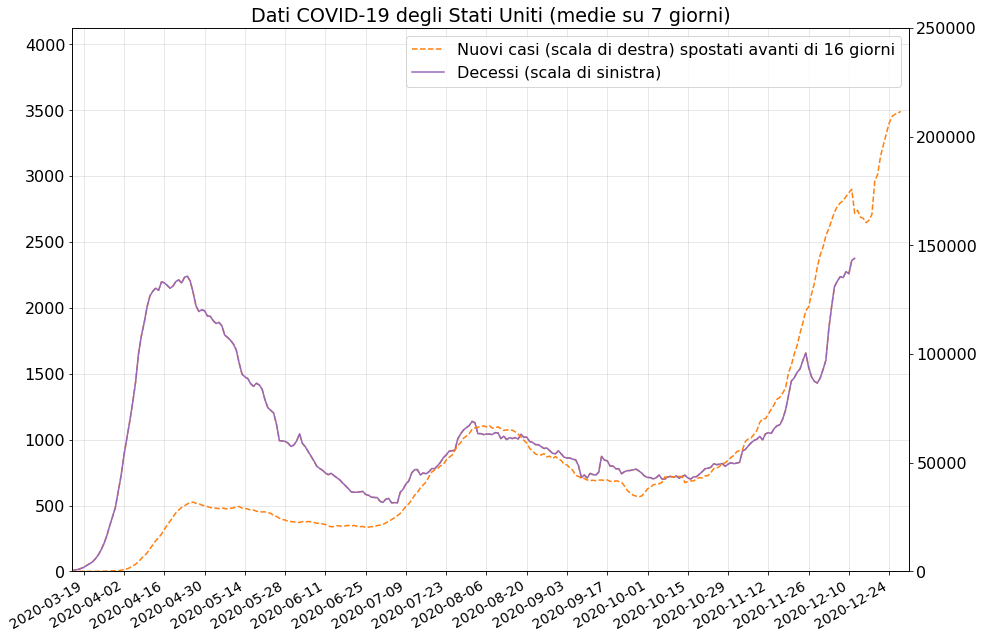

In [66]:
_, ax1 = covid19.plot.subplots(subplot_kw={'xlim': tuple(map(np.datetime64, ('2020-03-15', '2020-12-31')))})
ax2 = ax1.twinx()

usa = ds_states.sum('location')
usa['mortality'] = usa['deaths'] / usa['population'] * 1_000_000
usa['daily_mortality'] = usa['daily_deaths'] / usa['population'] * 1_000_000
usa['daily_mortality7'] = usa['daily_mortality'].rolling({'time': 7}).mean()
usa['daily_deaths7'] = usa['daily_deaths'].rolling({'time': 7}).mean()
usa['daily_prevalence'] = usa['daily_confirmed'] / usa['population'] * 1_000_000
usa['daily_prevalence7'] = usa['daily_prevalence'].rolling({'time': 7}).mean()
usa['daily_confirmed7'] = usa['daily_confirmed'].rolling({'time': 7}).mean()
usa['daily_confirmed14'] = usa['daily_confirmed'].rolling({'time': 14}).mean()


covid19.plot.plot_data(ax2, usa['daily_confirmed7'], delay=16, color='tab:orange', marker=None, linestyle='--')
covid19.plot.plot_data(ax1, usa['daily_deaths7'], label='Nuovi casi (scala di destra) spostati avanti di 16 giorni', color='tab:orange', marker=None, linestyle='--')
covid19.plot.plot_data(ax1, usa['daily_deaths7'], label='Decessi (scala di sinistra)', color='tab:purple', date_interval=14, marker=None)
# covid19.plot.plot_data(ax2, usa['daily_prevalence7'])
ax1.set(ylim=(0, 250000. * 0.0165), ylabel='', xlabel='') 
ax1.set(title=f'Dati COVID-19 degli Stati Uniti (medie su 7 giorni)', ylabel='')
_ = ax2.set(ylim=(0, 250000.), ylabel='', xlabel='') 
ax1.legend()

In [67]:
usa.to_dataframe().tail(20)

population  deaths  confirmed   mortality  daily_deaths  \
time                                                                  
2020-11-23   332865687  257782   12418378  774.432482         913.0   
2020-11-24   332865687  259929   12591366  780.882531        2147.0   
2020-11-25   332865687  262222   12772653  787.771195        2293.0   
2020-11-26   332865687  263456   12883307  791.478396        1234.0   
2020-11-27   332865687  264858   13088821  795.690305        1402.0   
2020-11-28   332865687  266047   13244701  799.262316        1189.0   
2020-11-29   332865687  266873   13383334  801.743798         826.0   
2020-11-30   332865687  268045   13541185  805.264737        1172.0   
2020-12-01   332865687  270642   13721822  813.066683        2597.0   
2020-12-02   332865687  273446   13921929  821.490501        2804.0   
2020-12-03   332865687  276325   14139609  830.139635        2879.0   
2020-12-04   332865687  278932   14367437  837.971623        2607.0   
2020-12-05   332865687  281186   14581318  844.743123        2254.0   
2020-12-06   332865687  282299   14756982  848.086814        1113.0   
2020-12-07   332865687  283703   14949417  852.304732        1404.0   
2020-12-08   332865687  286249   15165295  859.953462        2546.0   
2020-12-09   332865687  289373   15386562  869.338629        3124.0   
2020-12-10   332865687  292141   15611014  877.654295        2768.0   
2020-12-11   332865687  295450   15842789  887.595242        3309.0   
2020-12-12   332865687  297818   16062299  894.709222        2368.0   

            daily_mortality  daily_mortality7  daily_confirmed  \
time                                                             
2020-11-23         2.742848          4.614474         171515.0   
2020-11-24         6.450049          4.808889         172988.0   
2020-11-25         6.888664          4.978842         181287.0   
2020-11-26         3.707201          4.655245         110654.0   
2020-11-27         4.211909          4.438084         205514.0   
2020-11-28         3.572011          4.334653         155880.0   
2020-11-29         2.481481          4.293452         138633.0   
2020-11-30         3.520940          4.404608         157851.0   
2020-12-01         7.801946          4.597736         180637.0   
2020-12-02         8.423818          4.817044         200107.0   
2020-12-03         8.649134          5.523034         217680.0   
2020-12-04         7.831988          6.040188         227828.0   
2020-12-05         6.771500          6.497258         213881.0   
2020-12-06         3.343691          6.620431         175664.0   
2020-12-07         4.217917          6.719999         192435.0   
2020-12-08         7.648731          6.698111         215878.0   
2020-12-09         9.385167          6.835447         221267.0   
2020-12-10         8.315666          6.787809         224452.0   
2020-12-11         9.940947          7.089088         231775.0   
2020-12-12         7.113980          7.138014         219510.0   

            daily_prevalence  daily_prevalence7  daily_deaths7  \
time                                                             
2020-11-23        515.267889         518.036917    1536.000000   
2020-11-24        519.693098         523.364677    1600.714286   
2020-11-25        544.625076         527.988593    1657.285714   
2020-11-26        332.428377         494.779574    1549.571429   
2020-11-27        617.408186         499.069593    1477.285714   
2020-11-28        468.296992         489.534644    1442.857143   
2020-11-29        416.483301         487.743274    1429.142857   
2020-11-30        474.218299         481.879047    1466.142857   
2020-12-01        542.672336         485.161795    1530.428571   
2020-12-02        601.164397         493.238841    1603.428571   
2020-12-03        653.957462         539.171568    1838.428571   
2020-12-04        684.444234         548.748146    2010.571429   
2020-12-05        642.544451         573.640640    2162.714286   
2020-1

In [68]:
STATES_FIT_PARAMS = {
    'US / New York': {
        'deaths': ['2020-03-22', '2020-04-04'],
    },
    'US / New Jersey': {
        'deaths': [None, '2020-04-05', '2020-04-05'],
    },
    'US / Connecticut': {
        'deaths': [None, '2020-04-08'],
    },
    'US / Massachusetts': {
        'deaths': [None, '2020-04-07'],
    },
    'US / Louisiana': {
        'deaths': [None, '2020-04-01'],
    },
    'US / District of Columbia': {
        'deaths': [None, '2020-04-01'],
    },
    'US / Michigan': {
        'deaths': ['2020-03-25', '2020-04-02', None],
    },
    'US / Rhode Island': {
        'deaths': [None, '2020-04-08'],
    },
    'US / Pennsylvania': {
        'deaths': [None, '2020-04-08'],
    },
    'US / Maryland': {
        'deaths': [None, None],
    },
    'US / Illinois': {
        'deaths': [None, '2020-04-10'],
    },
    'US / Indiana': {
        'deaths': [None, '2020-04-08'],
    },
    'US / Colorado': {
        'deaths': [None, None],
    },
    'US / Washington': {
        'deaths': [None, '2020-03-26', '2020-04-10'],
    },
    'US / Georgia': {
        'deaths': [None, '2020-04-10'],
    },
    'US / California': {
        'deaths': [None, '2020-03-26', None],
    },
    'US / Florida': {
        'deaths': [None, None],
    },
    'US / Delaware': {
        'deaths': [None, None],
    },
    'US / Nebraska': {
        'deaths': [None, None],
    },
}

In [69]:
region_fits = {}
for region, params in list(STATES_FIT_PARAMS.items()):
    region_fits[region] = {}
    for kind, breaks in params.items():
        ds = ds_states.sel(location=region)
        region_fits[region][kind] = covid19.fit.fit_exponential_segments(ds[kind], breaks)
        if 'daily_' + kind in ds:
            kinf = 'daily_' + kind 
            region_fits[region][kind] = covid19.fit.fit_exponential_segments(ds[kind], breaks)


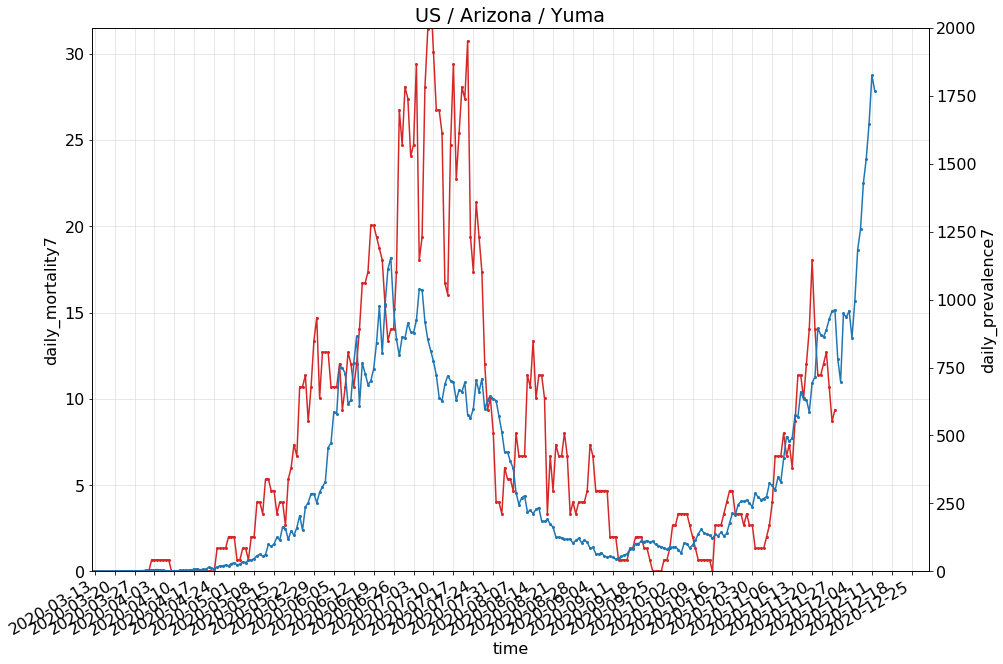

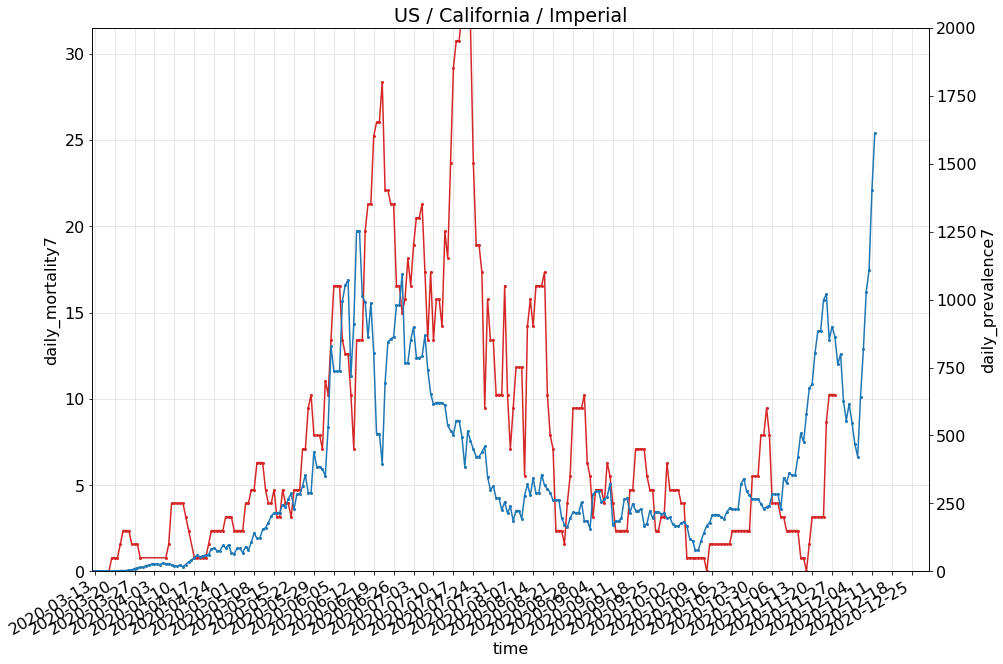

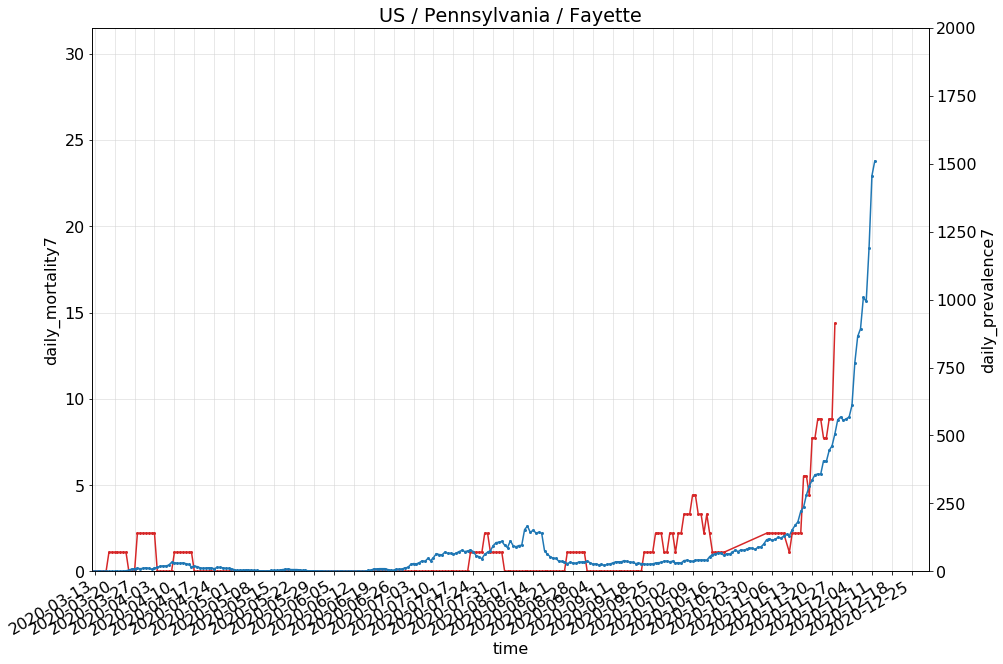

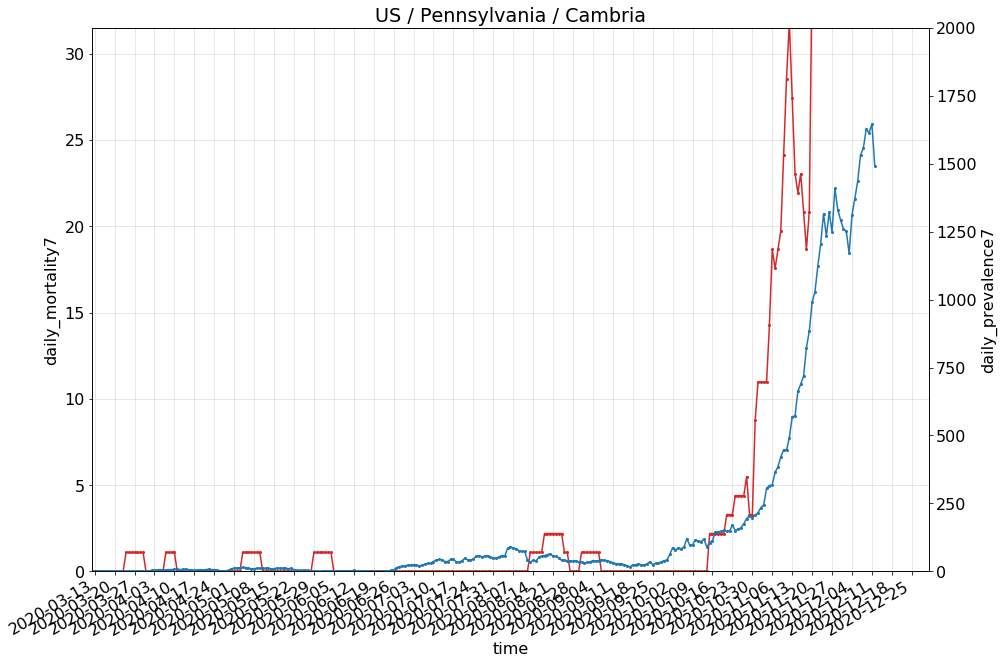

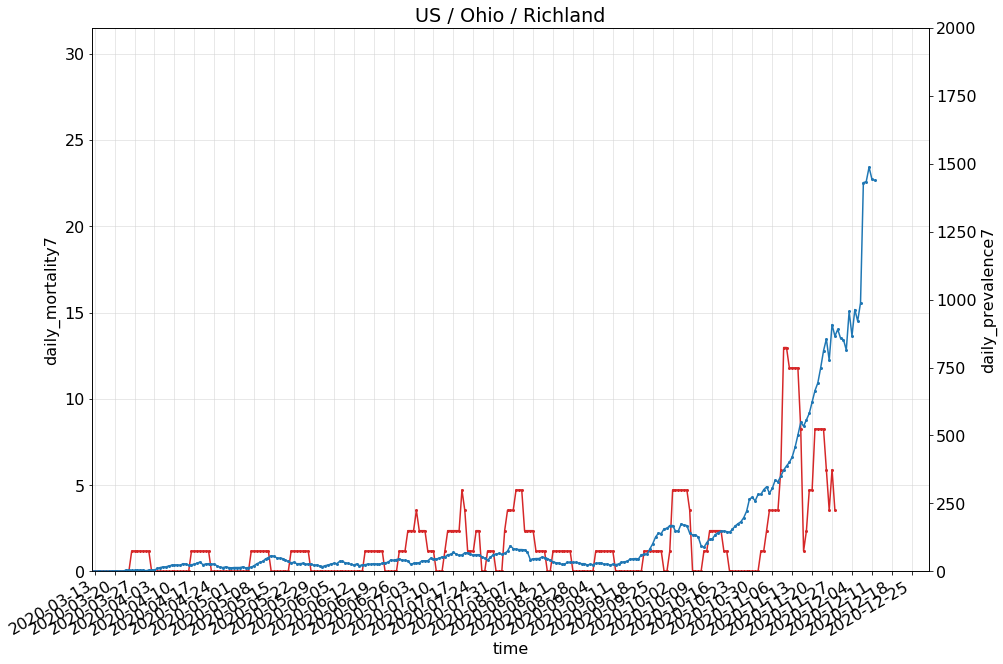

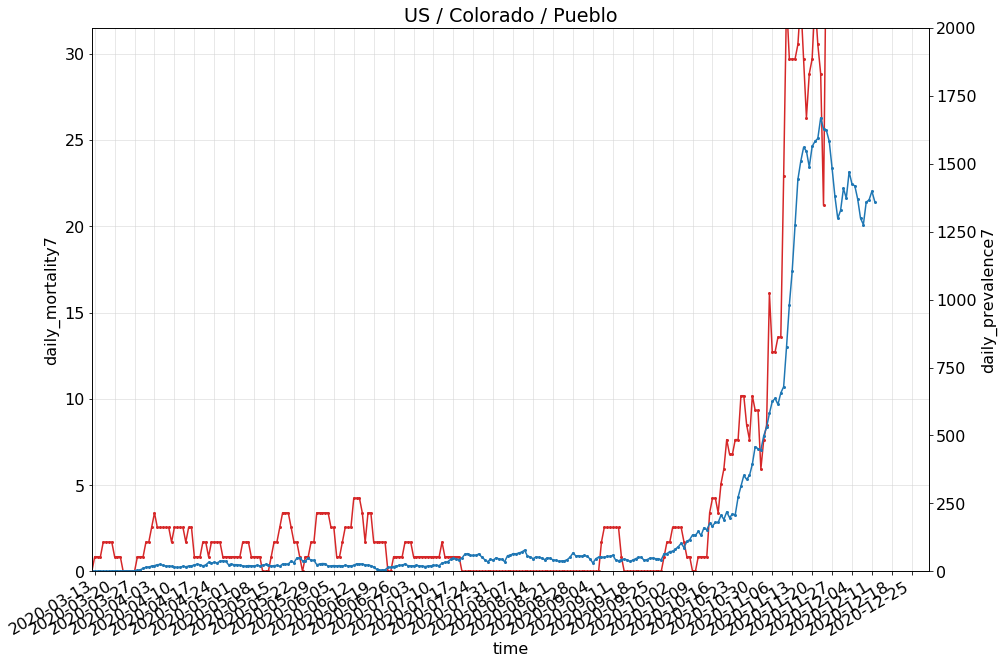

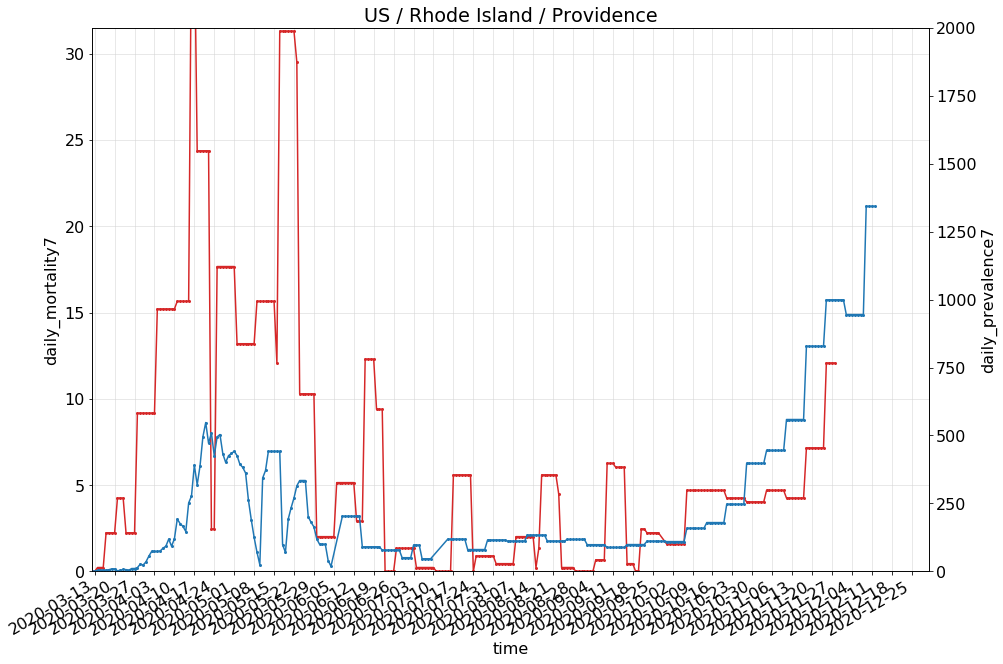

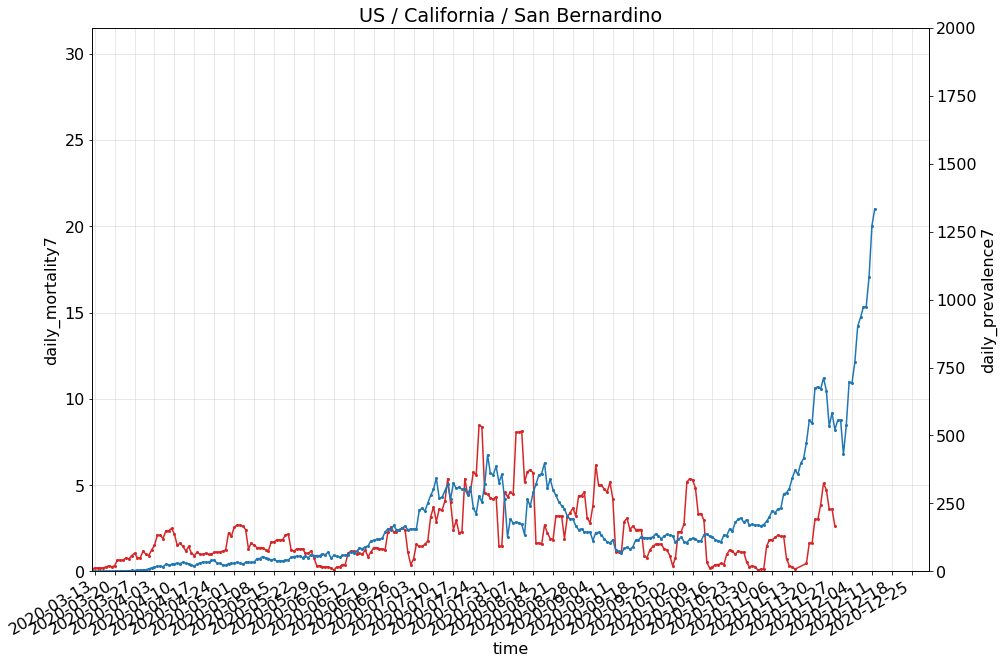

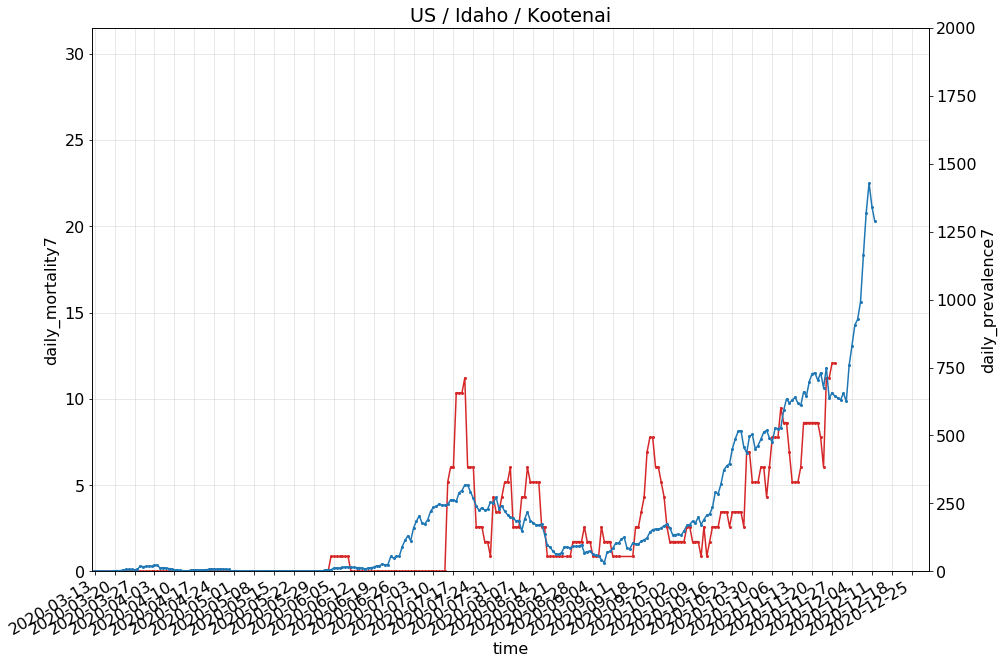

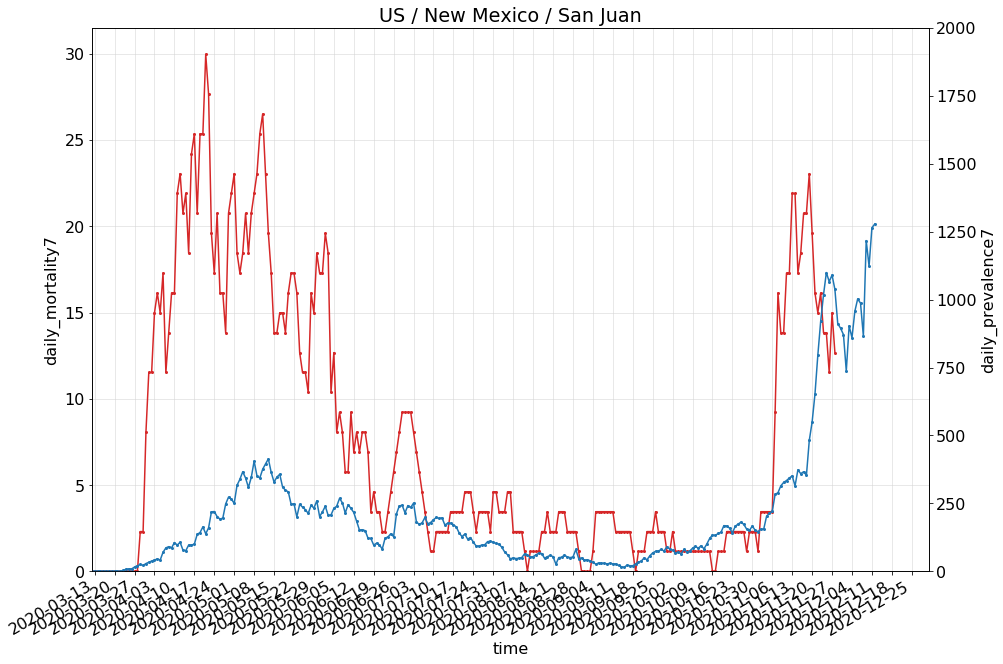

In [70]:
tmp = ds_counties.sortby(-ds_counties['daily_prevalence7'].isel(time=-1))
for location in list(tmp.sel(location=tmp['population'] > 100_000).location.values)[:10]:
    _, ax1 = plt.subplots(subplot_kw={'xlim': XLIM})

    ax1.yaxis.tick_right()
    ax1.yaxis.grid(color='lightgrey', linewidth=0.5)
    ax1.xaxis.grid(color='lightgrey', linewidth=0.5)

    ds = ds_counties.sel(location=location)

    ax2 = ax1.twinx()
    
    covid19.plot.plot_data(ax1, ds['daily_mortality7'], color=PALETTE_ONE[3], delay=-14)
    covid19.plot.plot_data(ax2, ds['daily_prevalence7'], color=PALETTE_ONE[0])

    ax1.set(ylim=(0, 2000. * 0.01575), title=location)
    ax2.set(ylim=(0, 2000.), title=None)

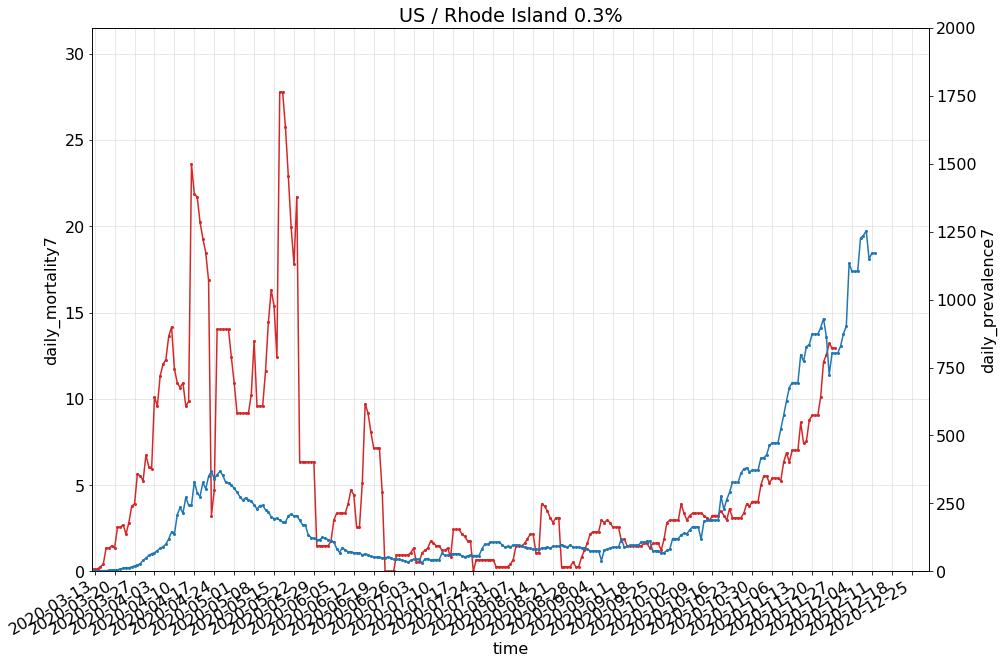

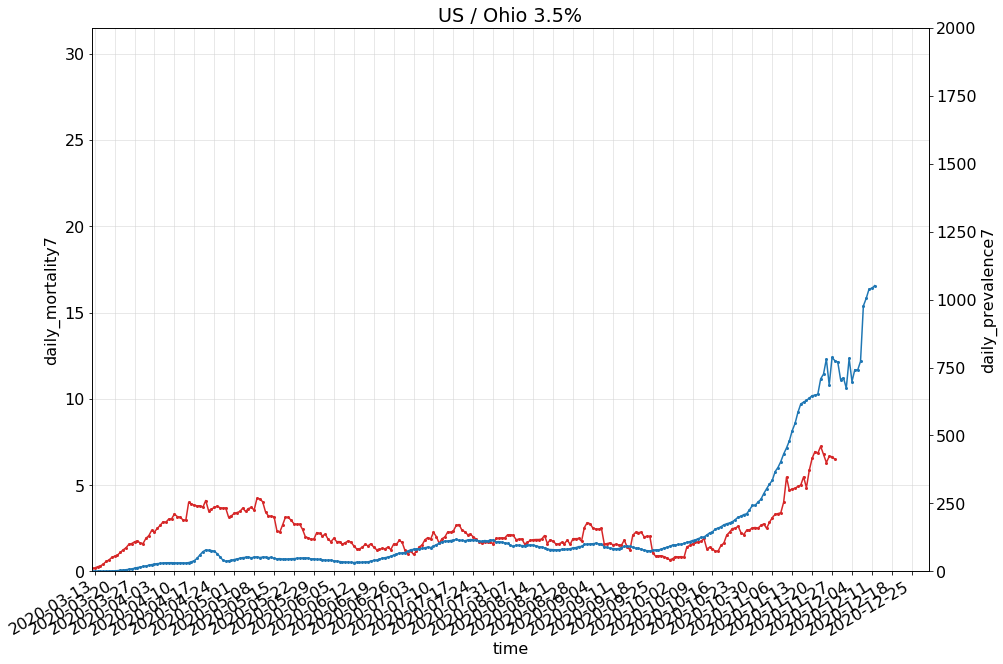

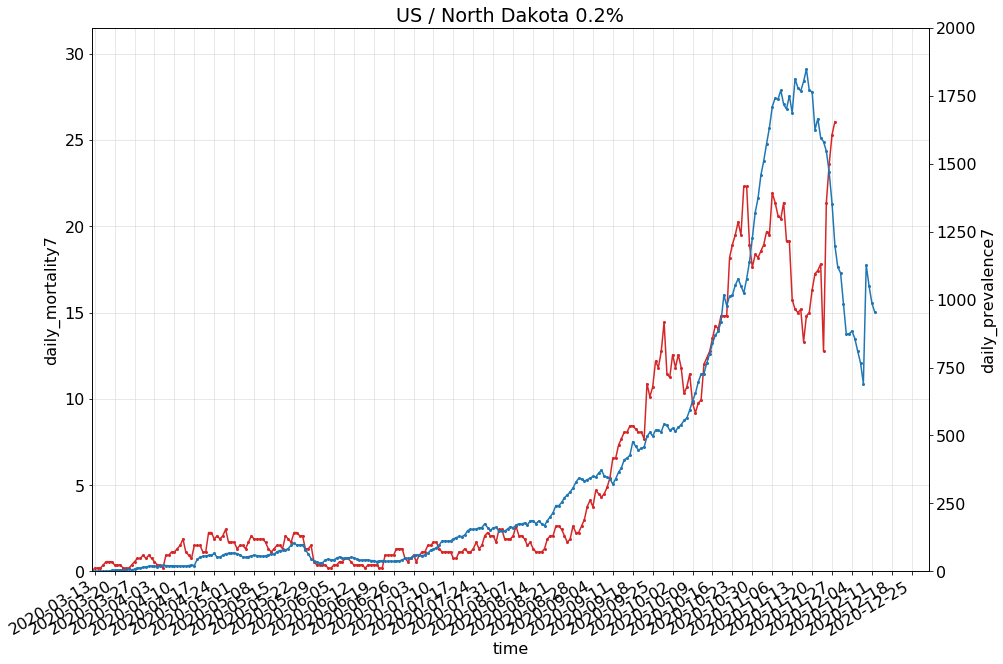

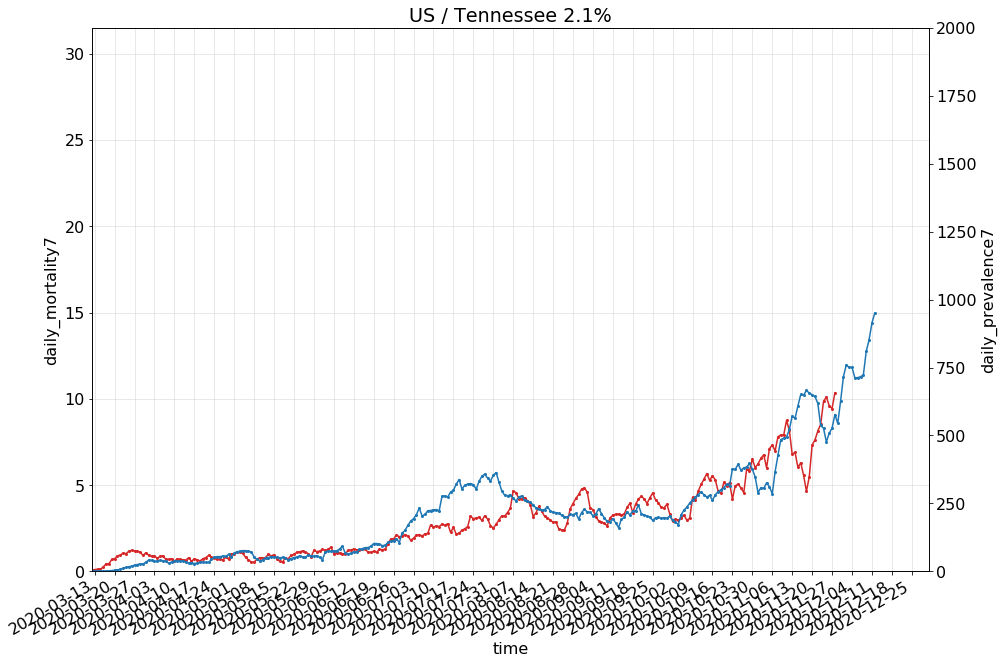

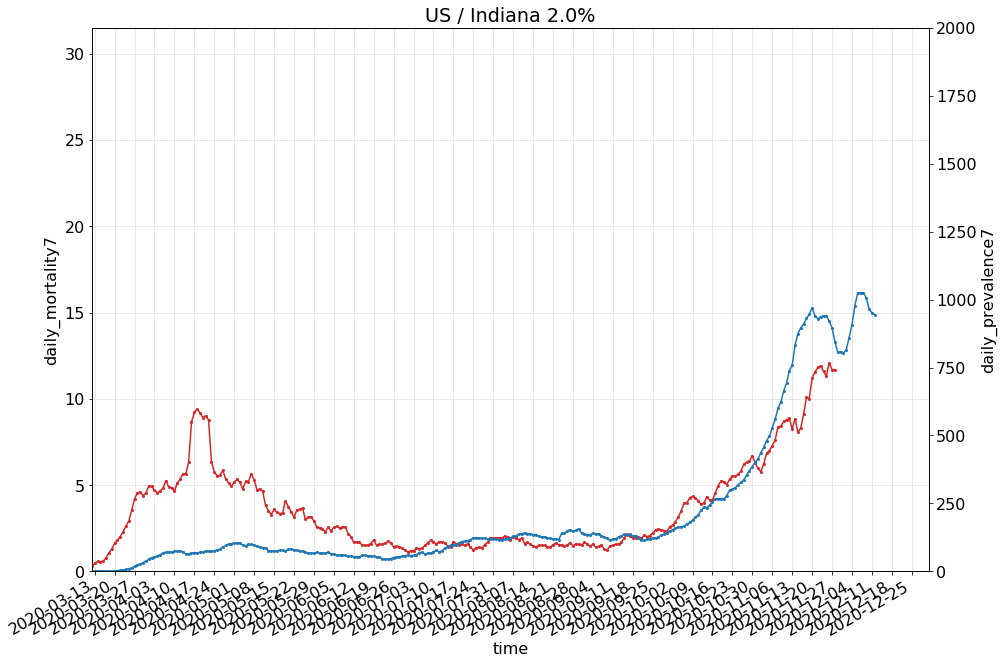

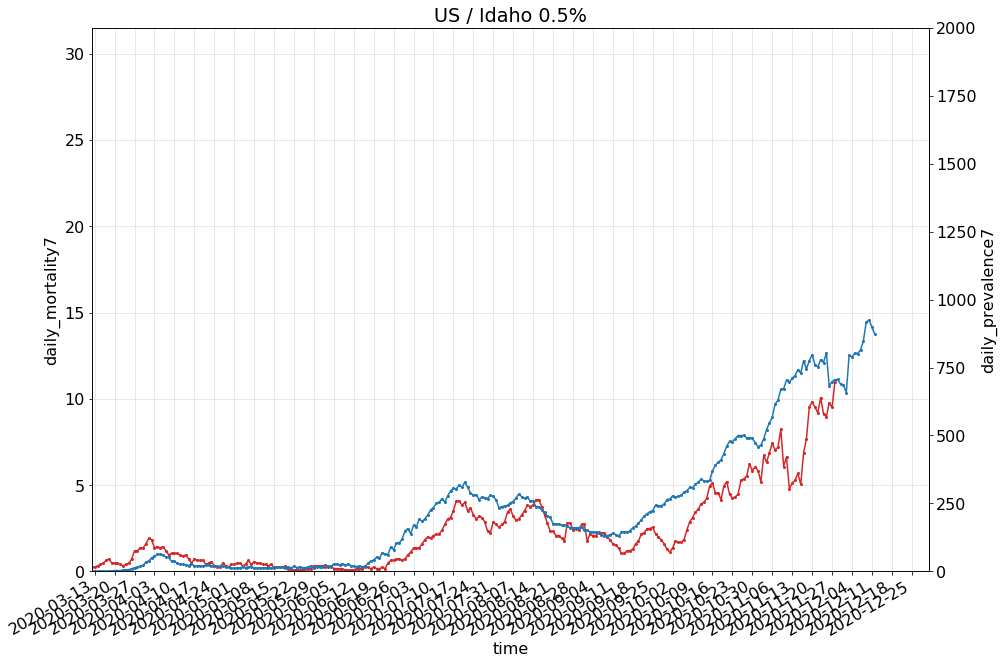

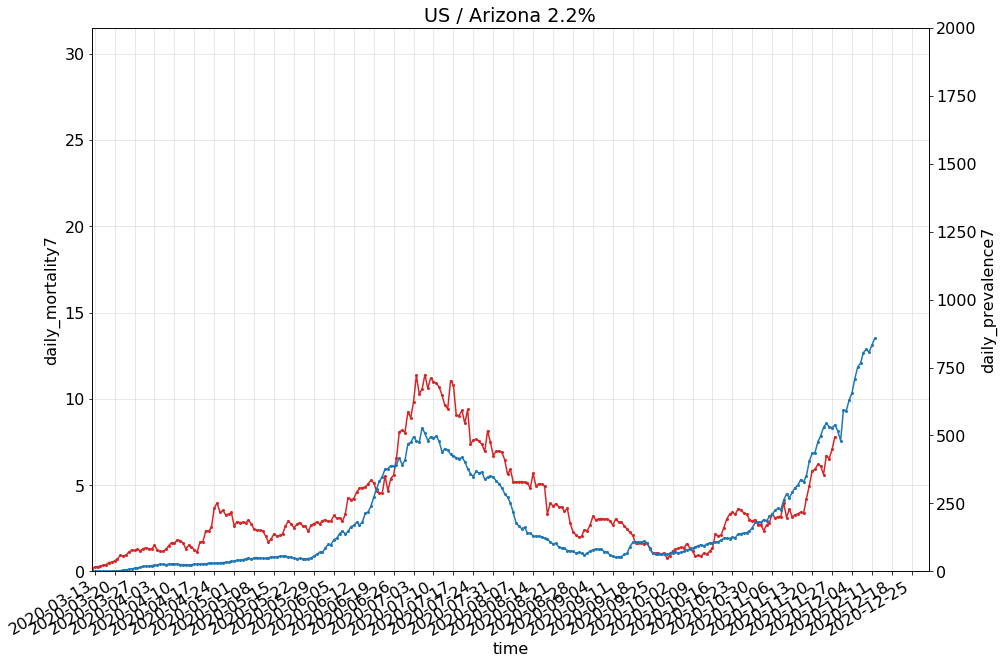

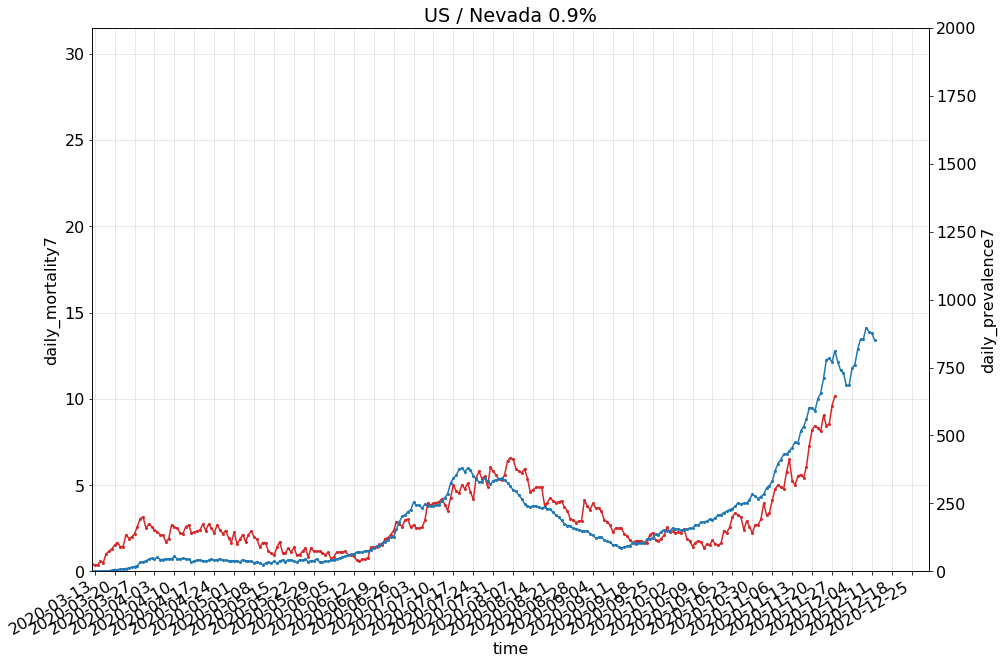

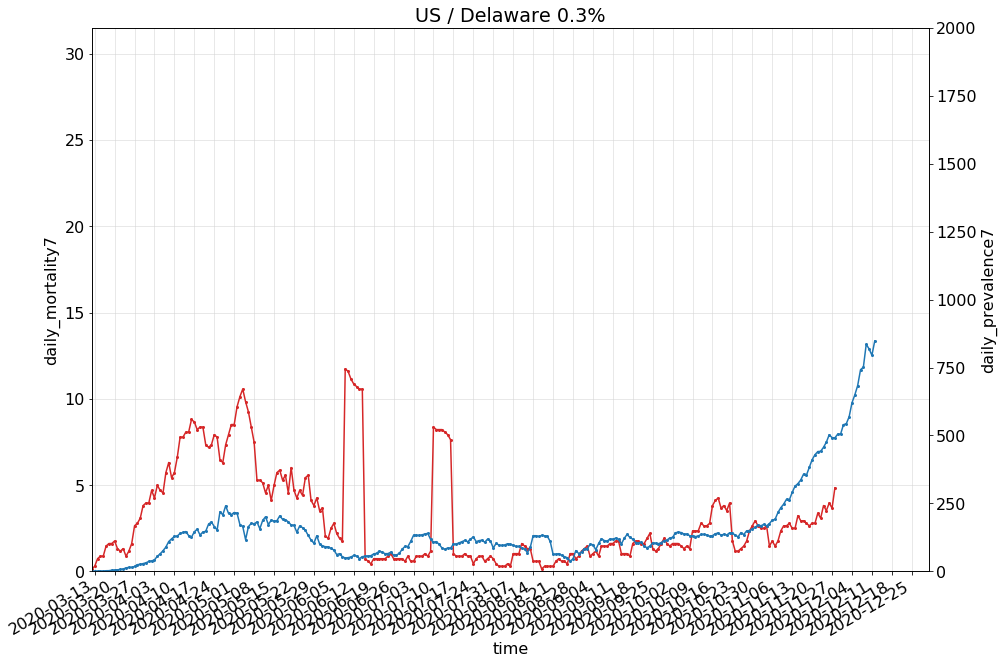

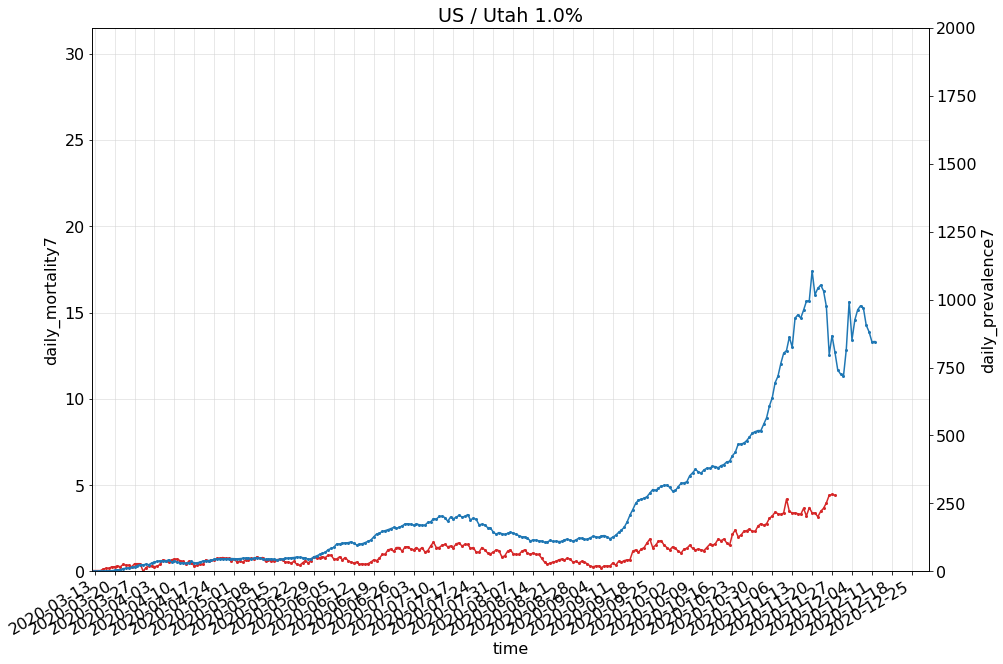

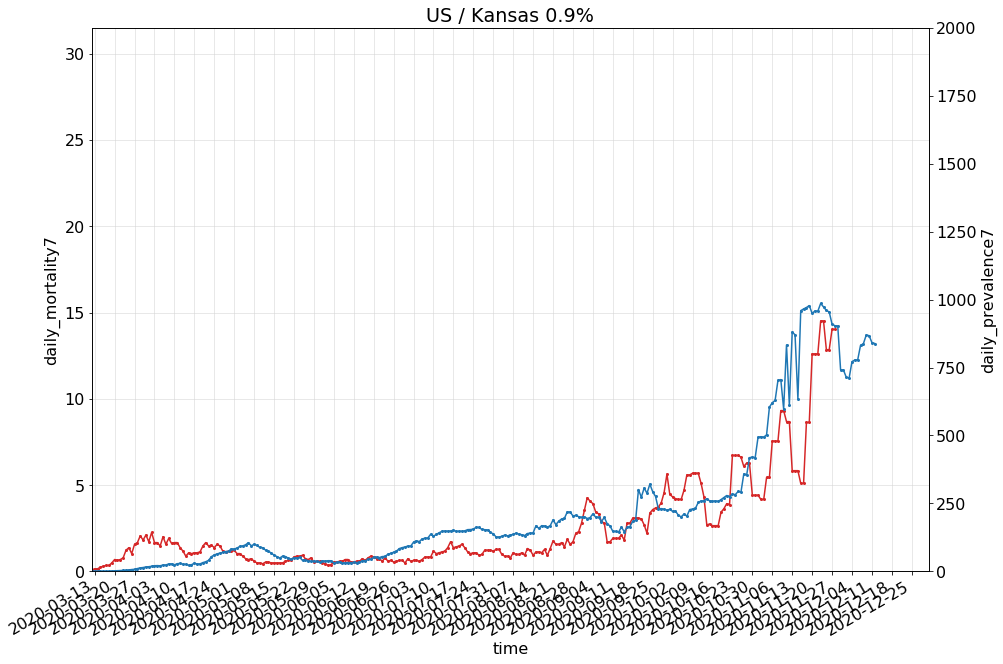

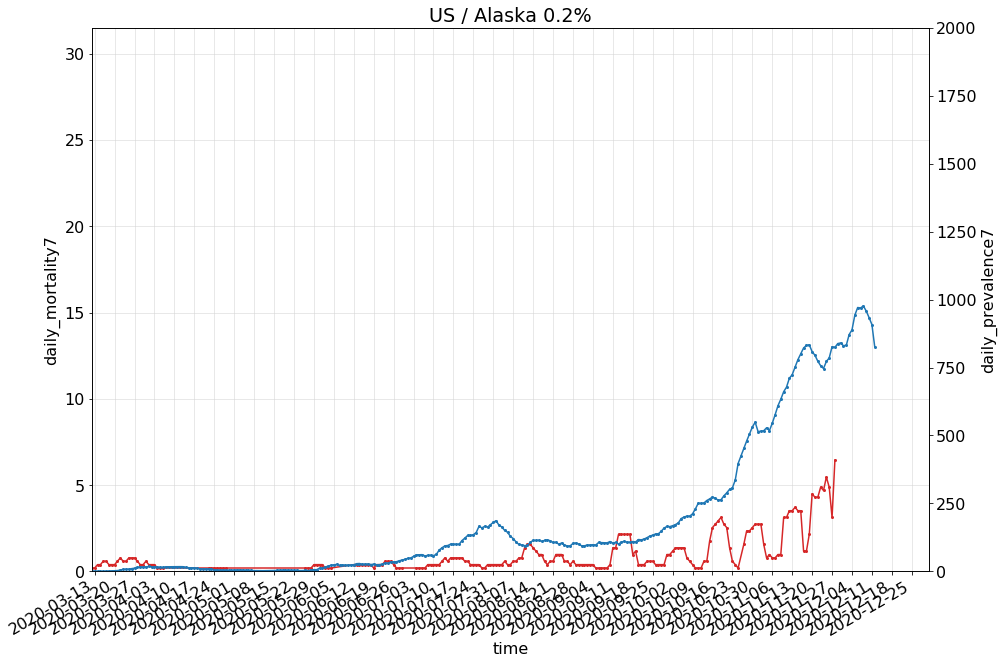

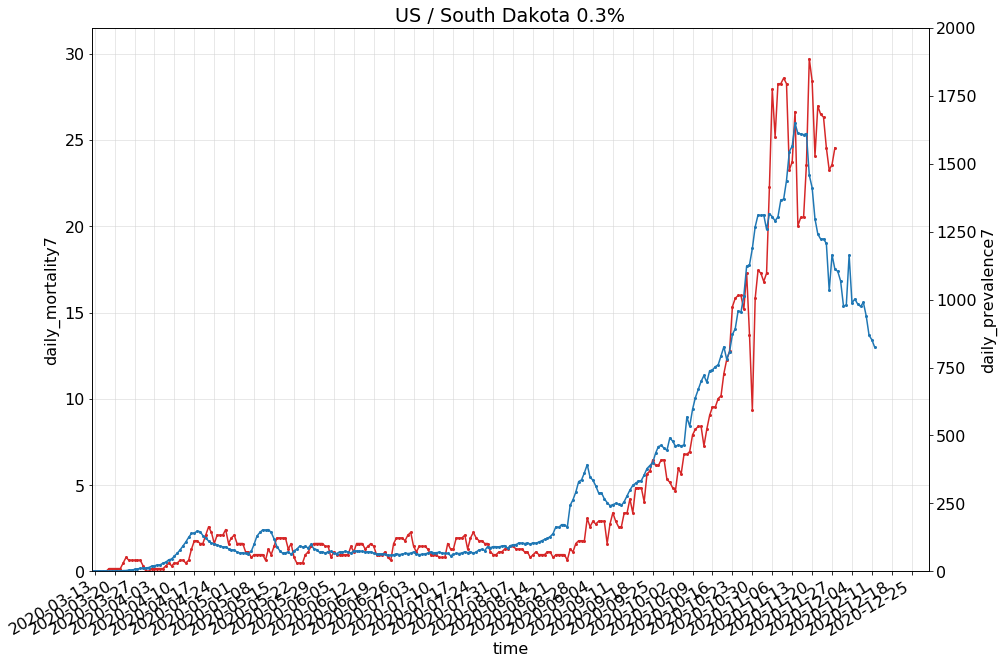

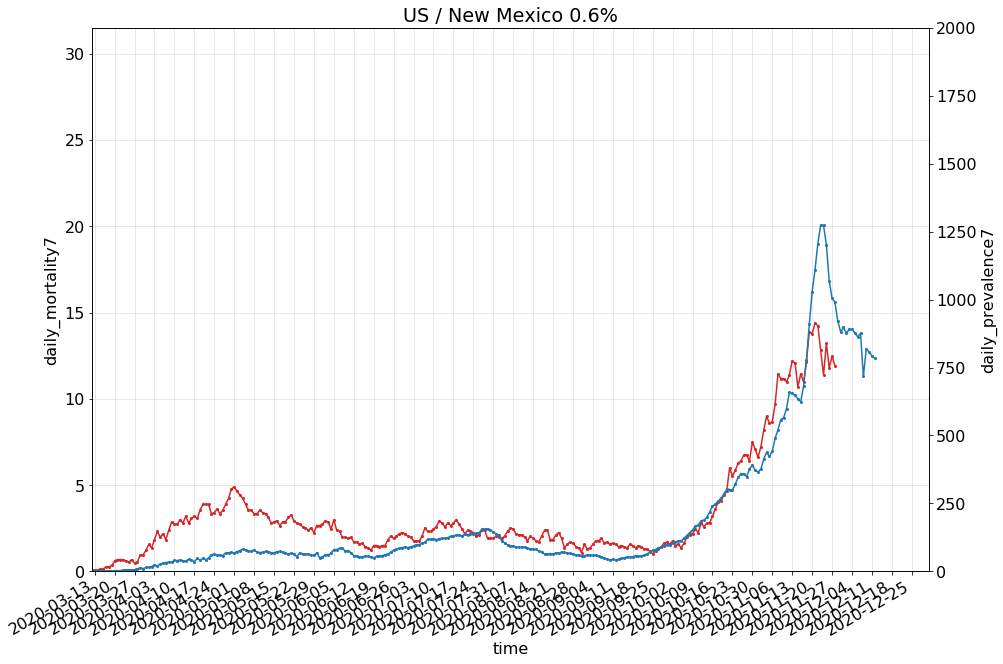

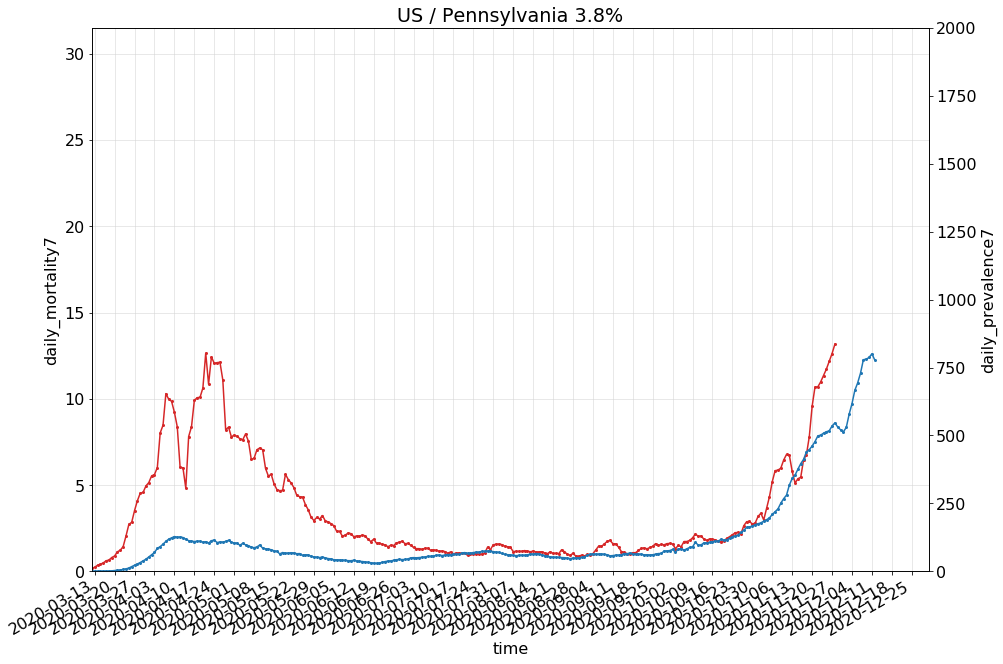

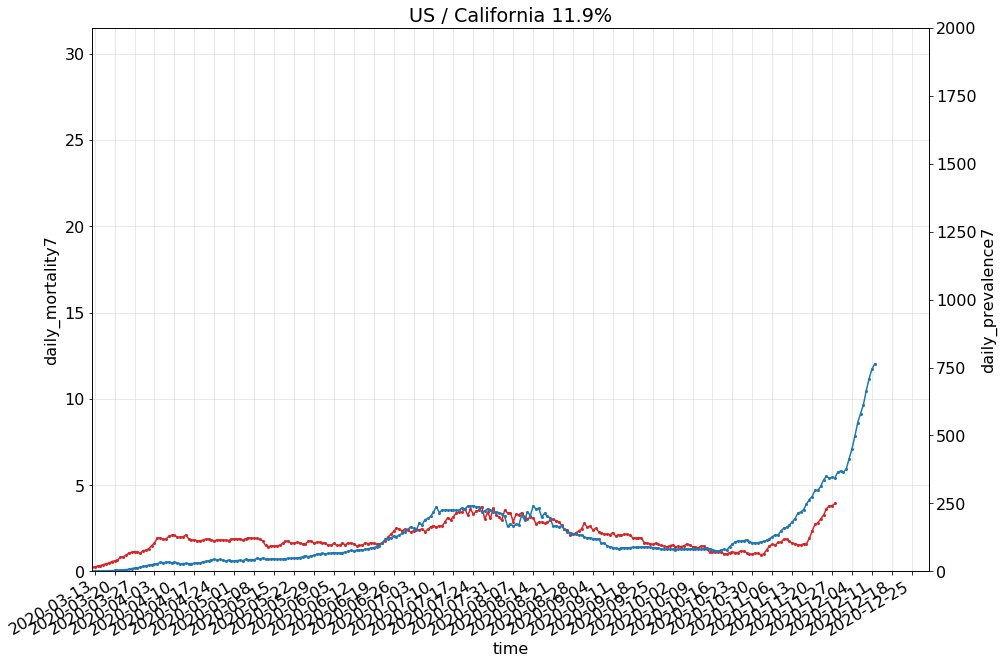

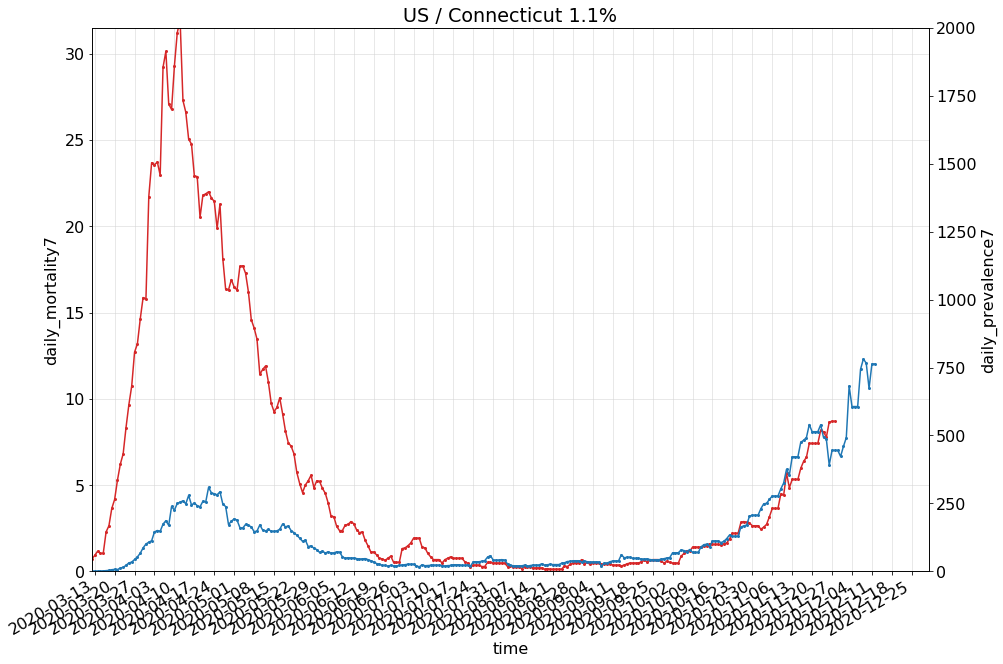

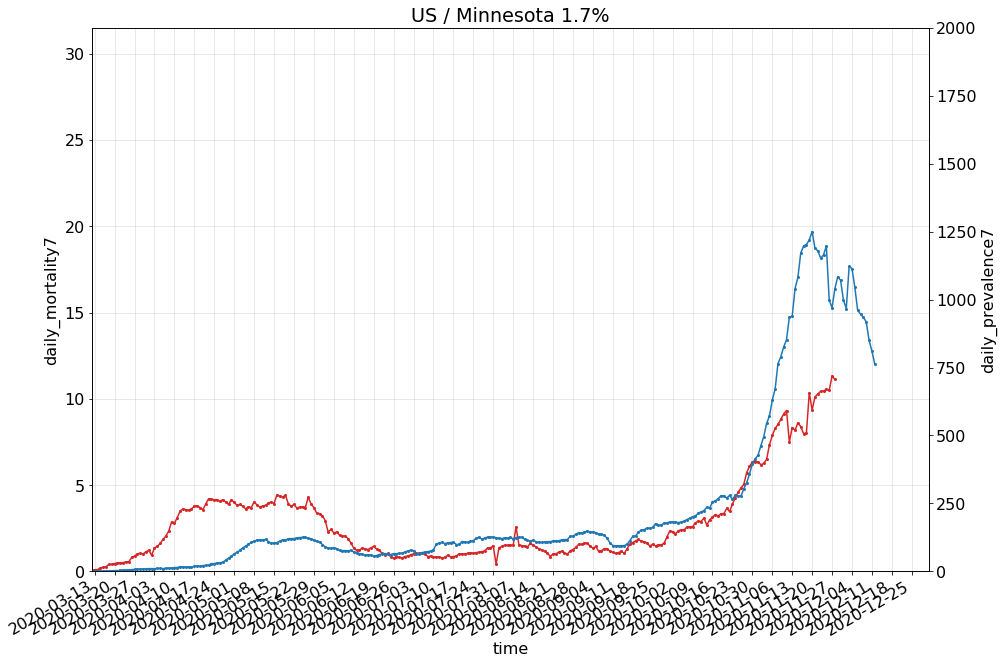

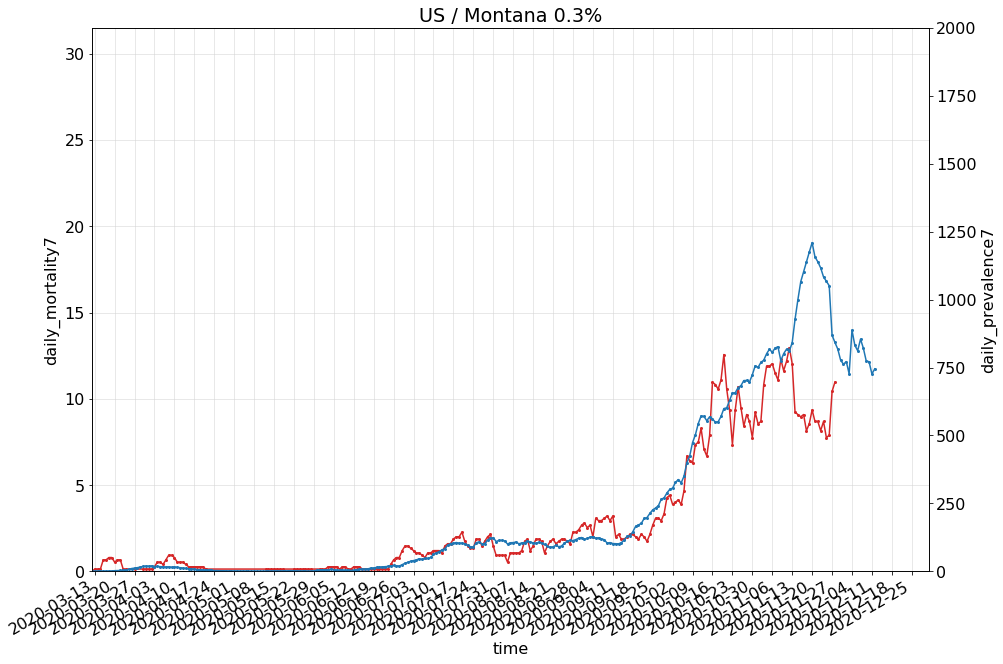

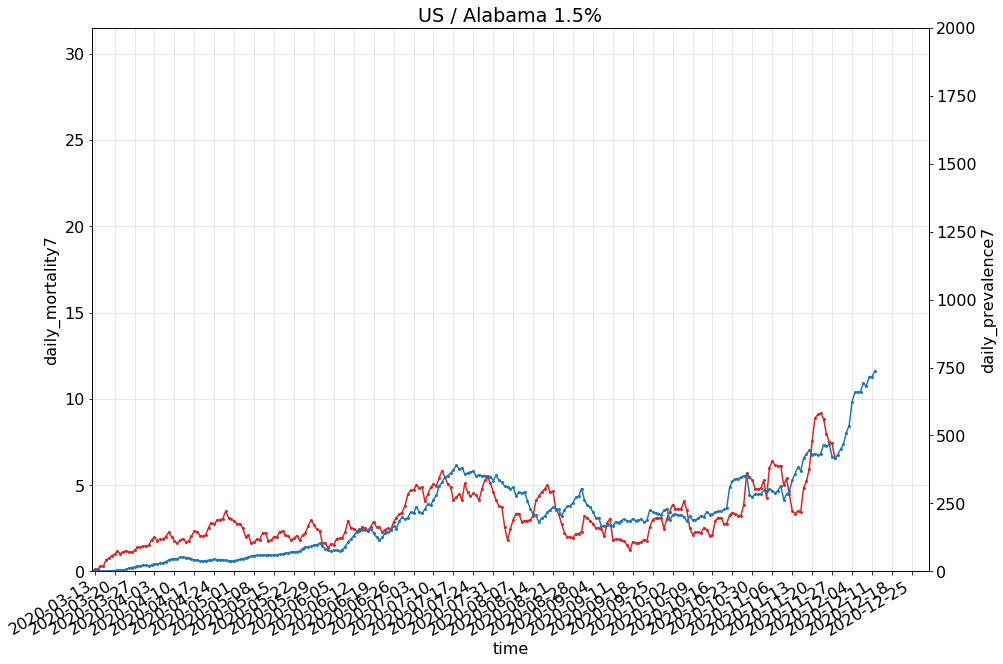

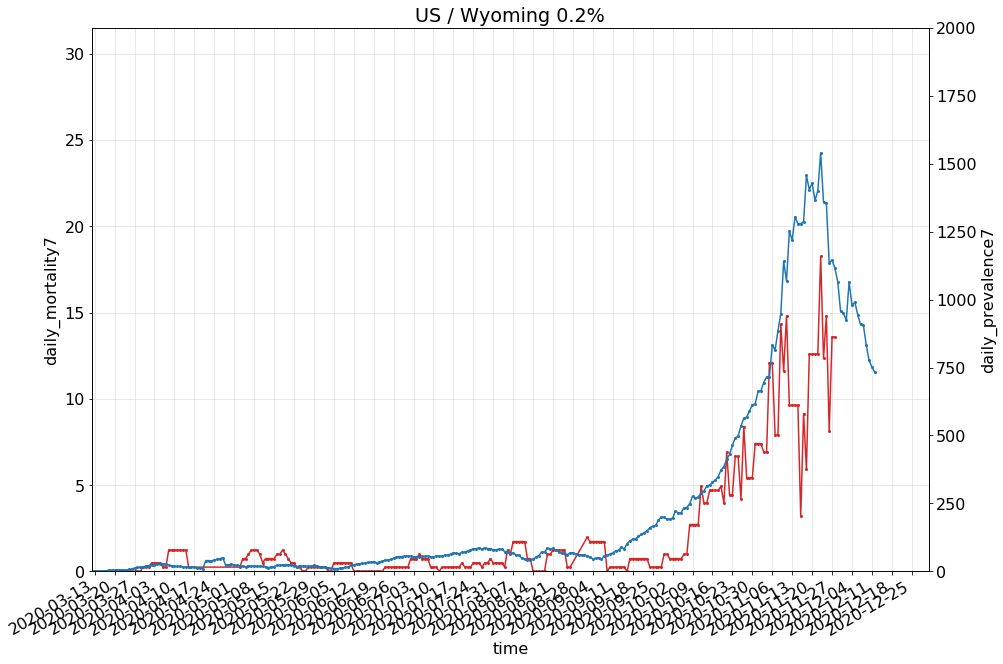

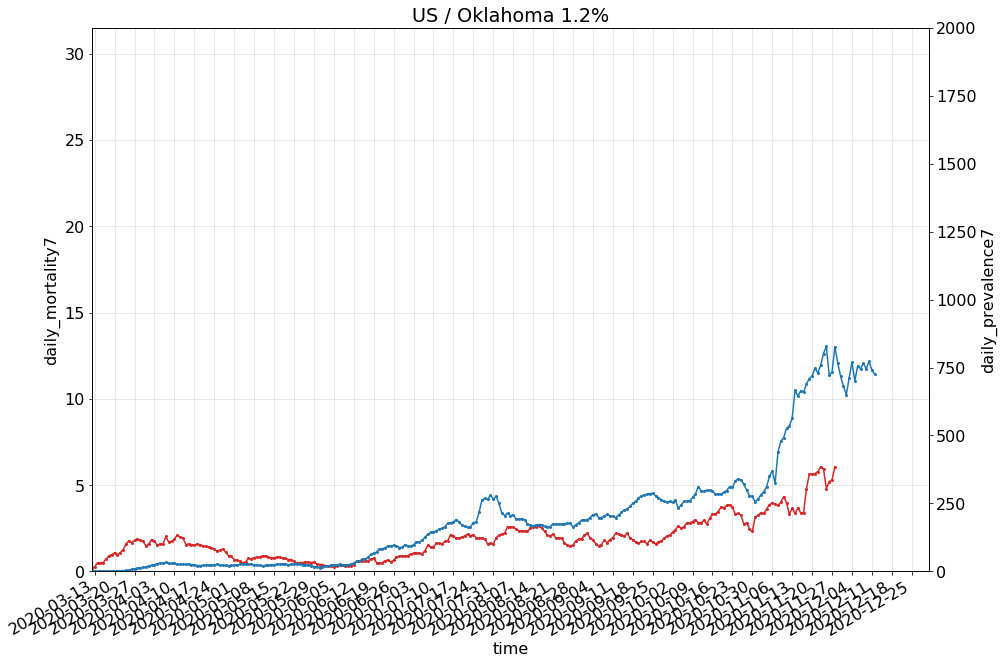

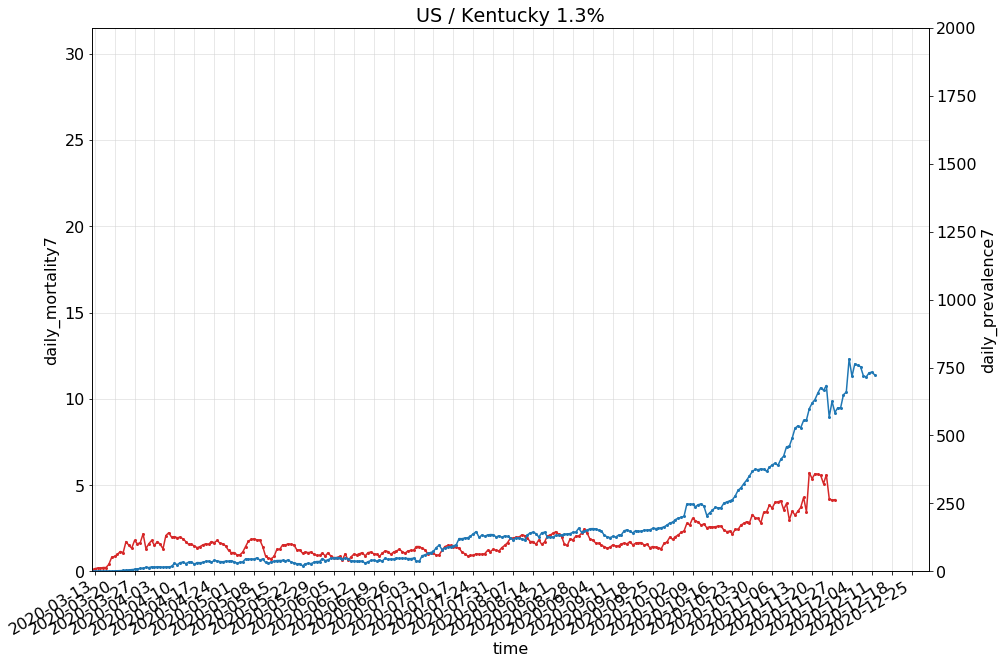

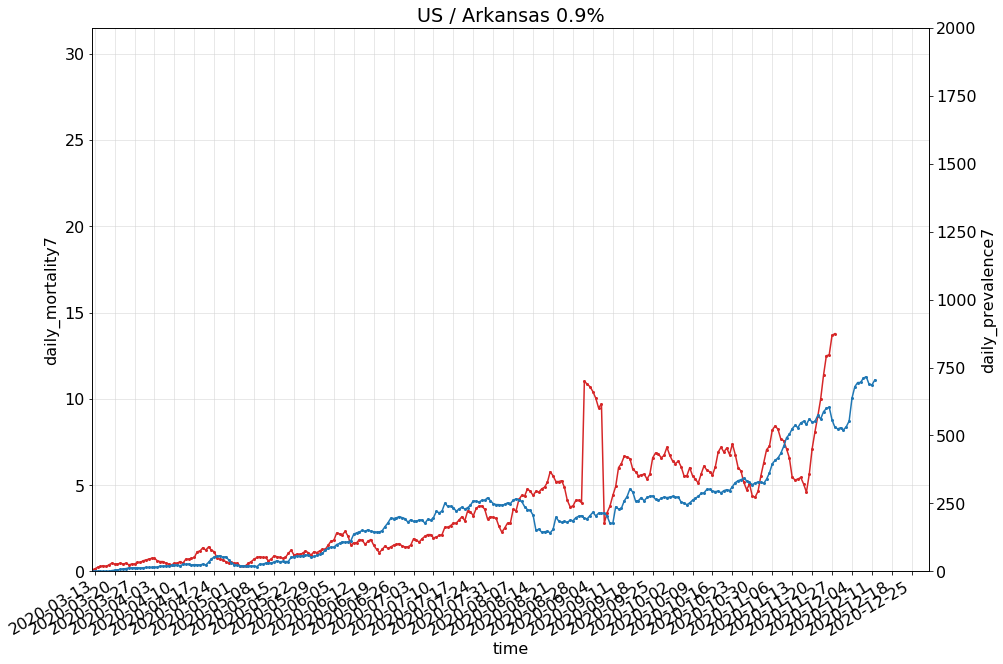

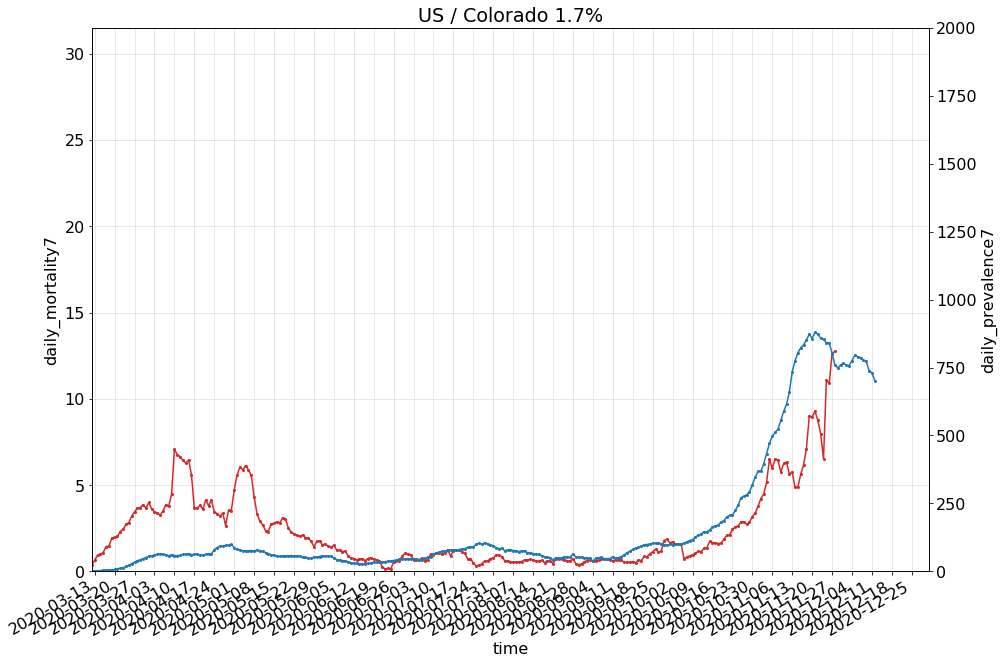

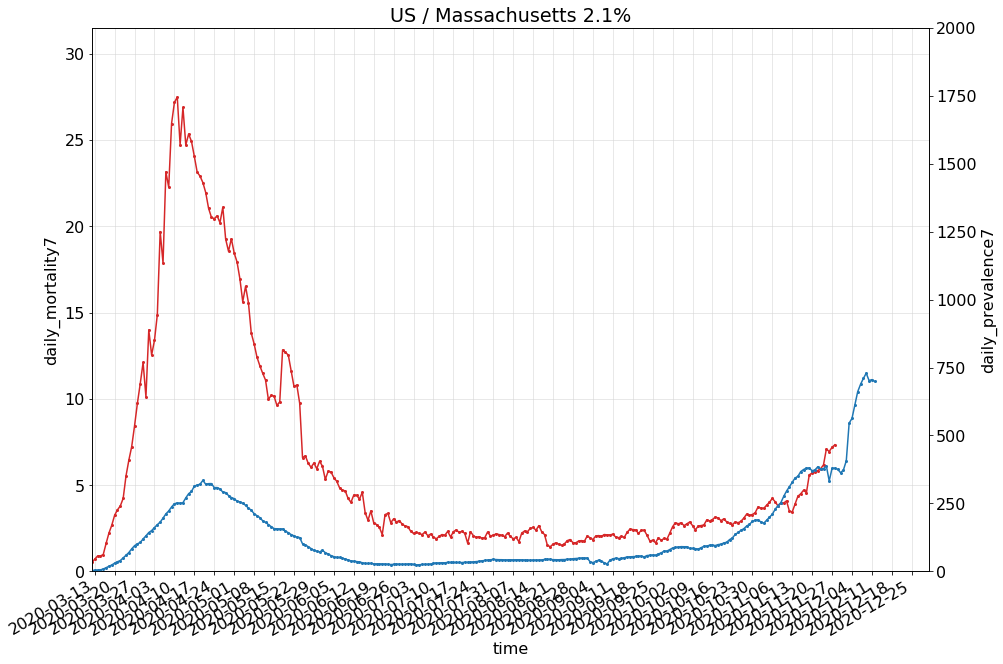

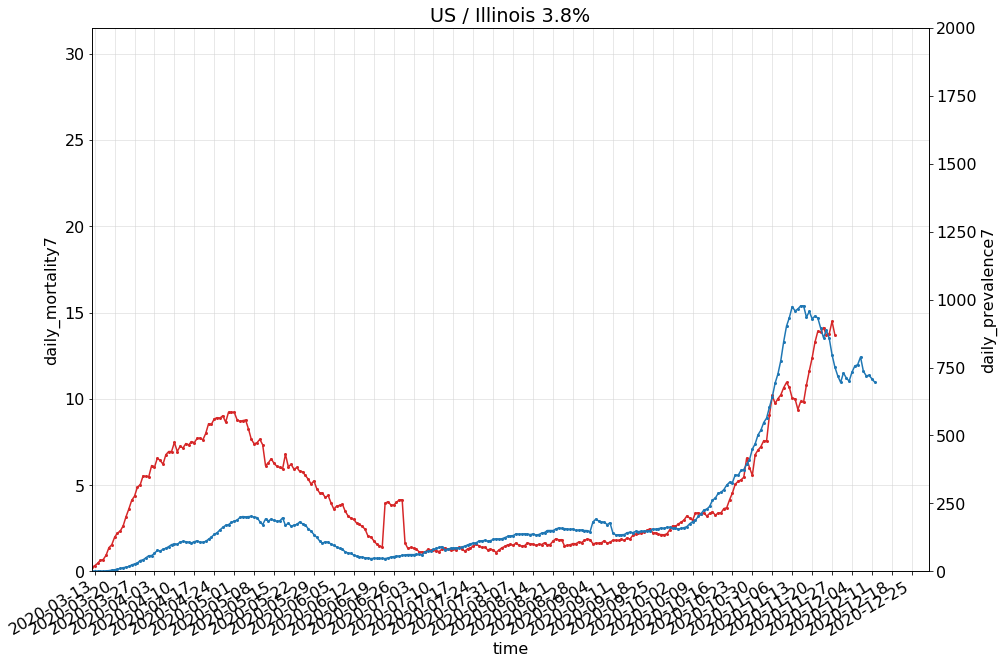

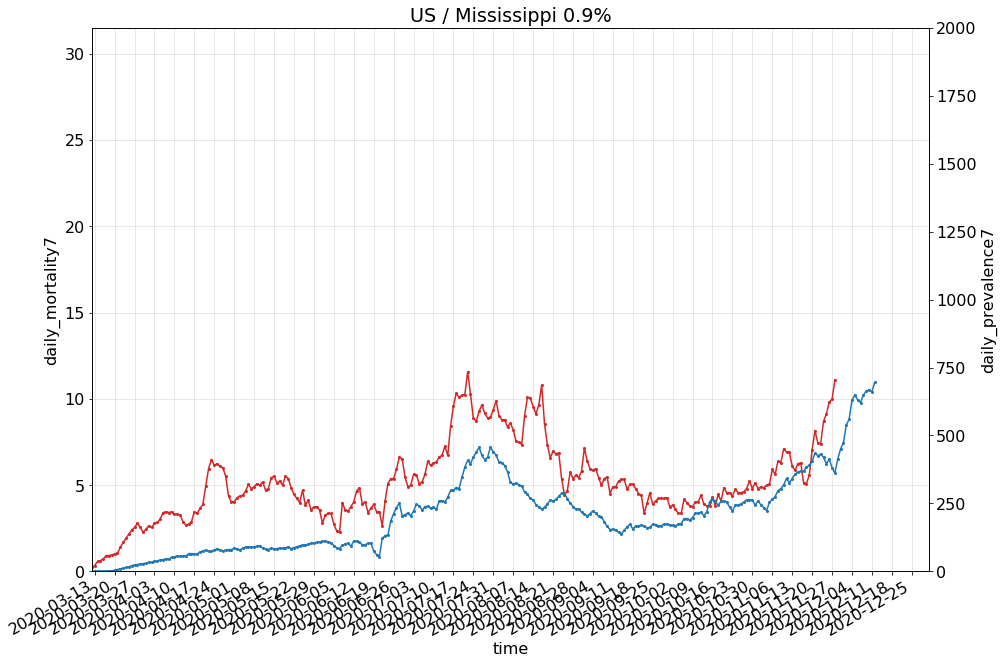

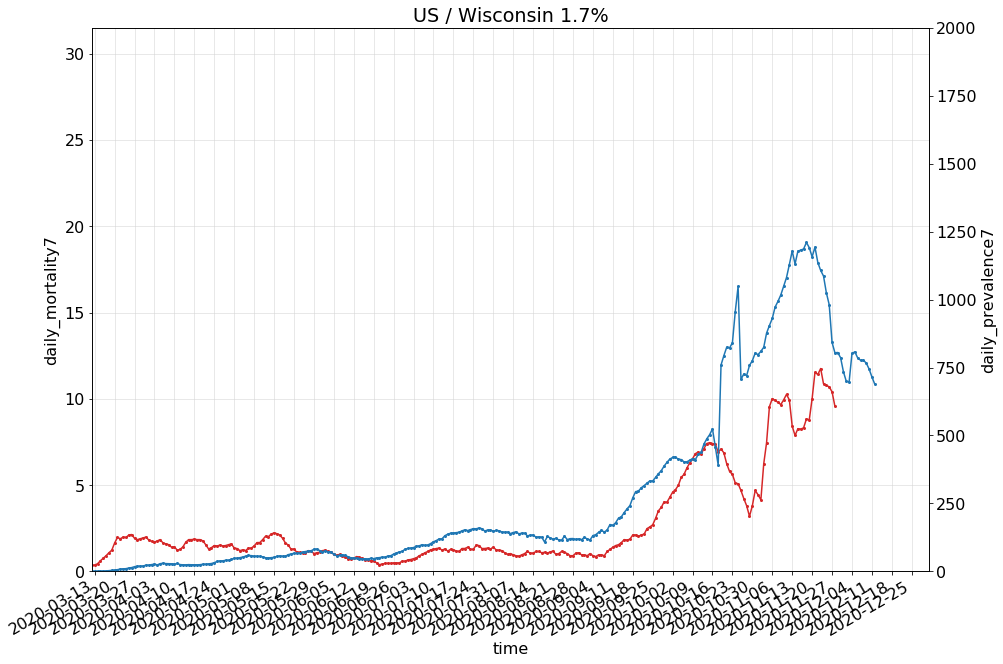

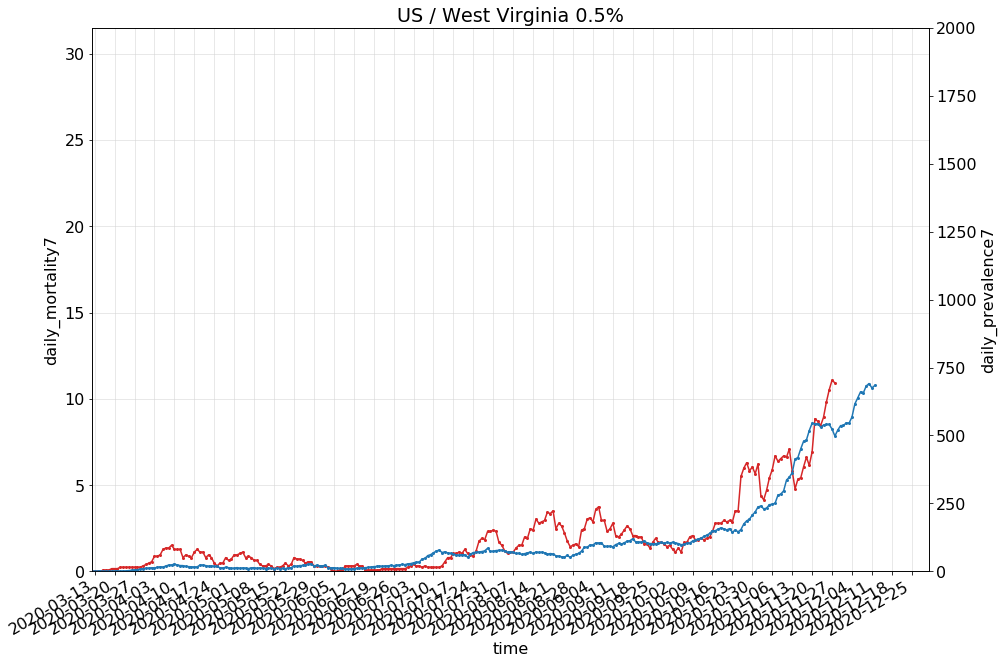

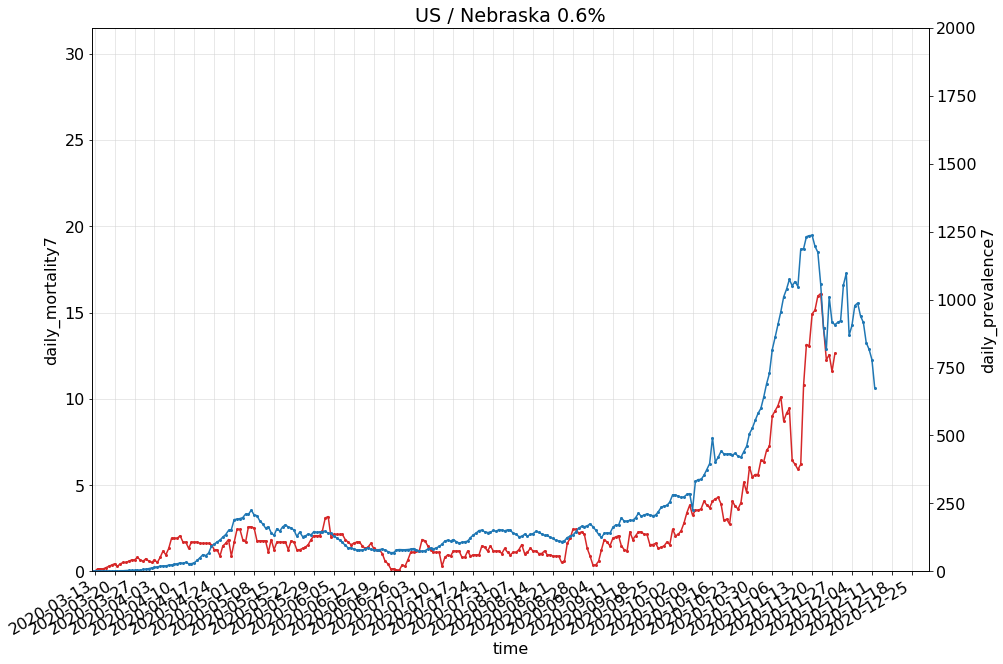

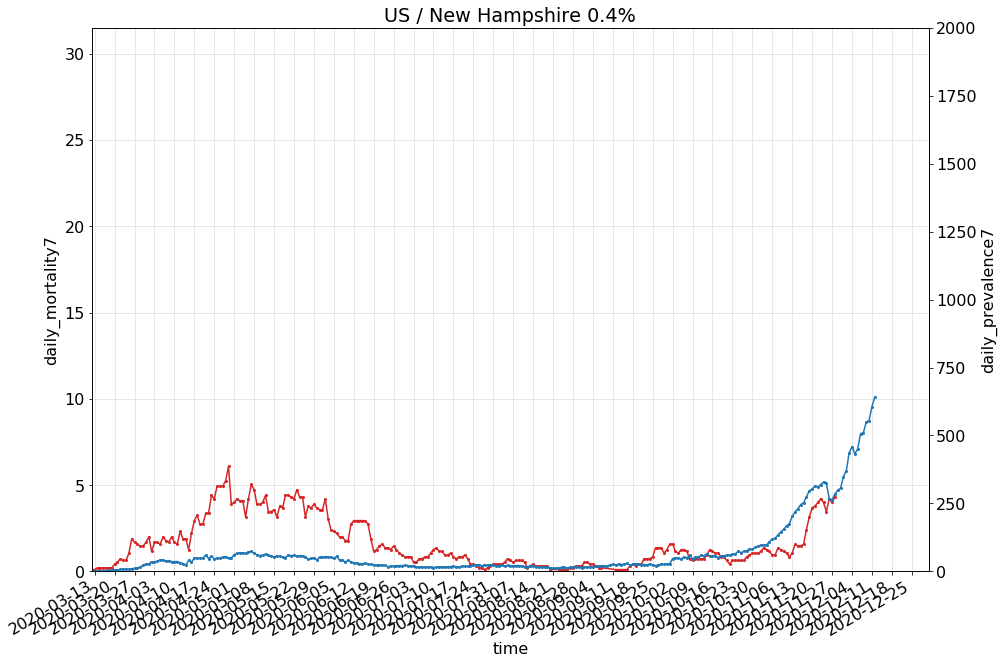

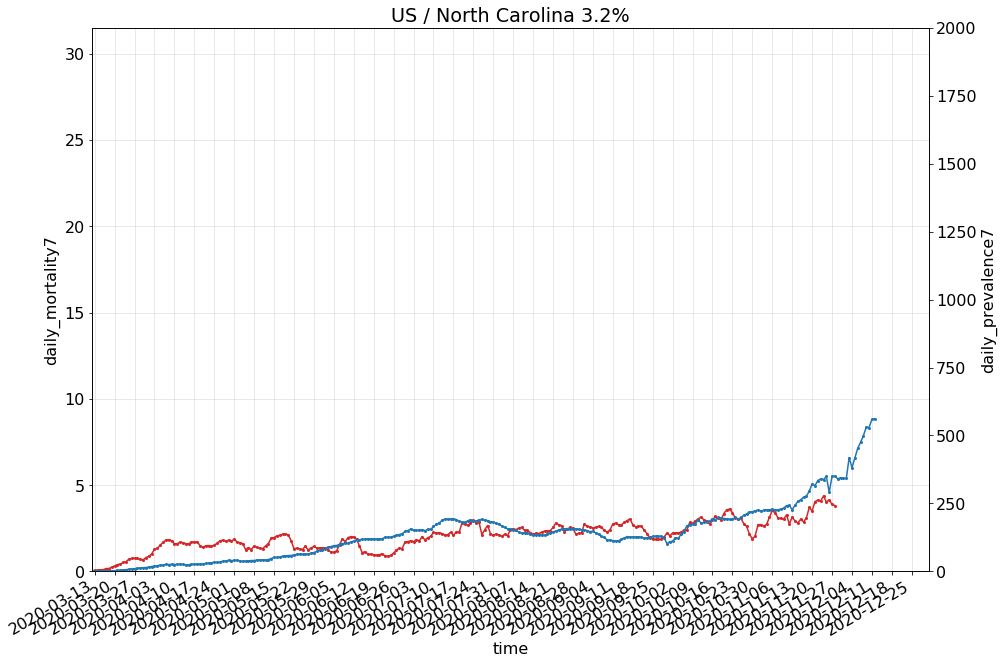

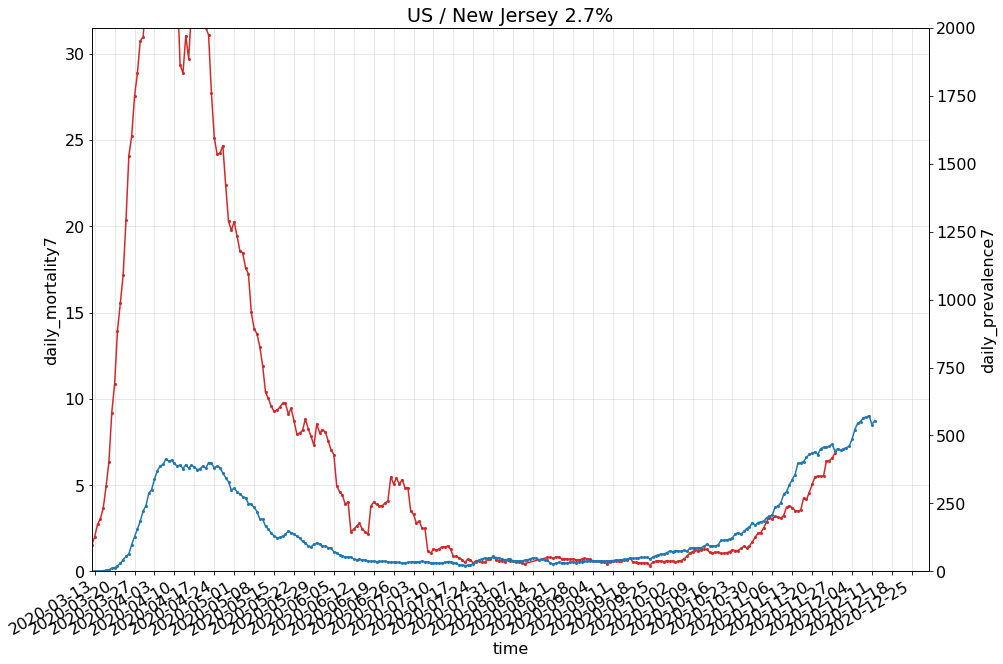

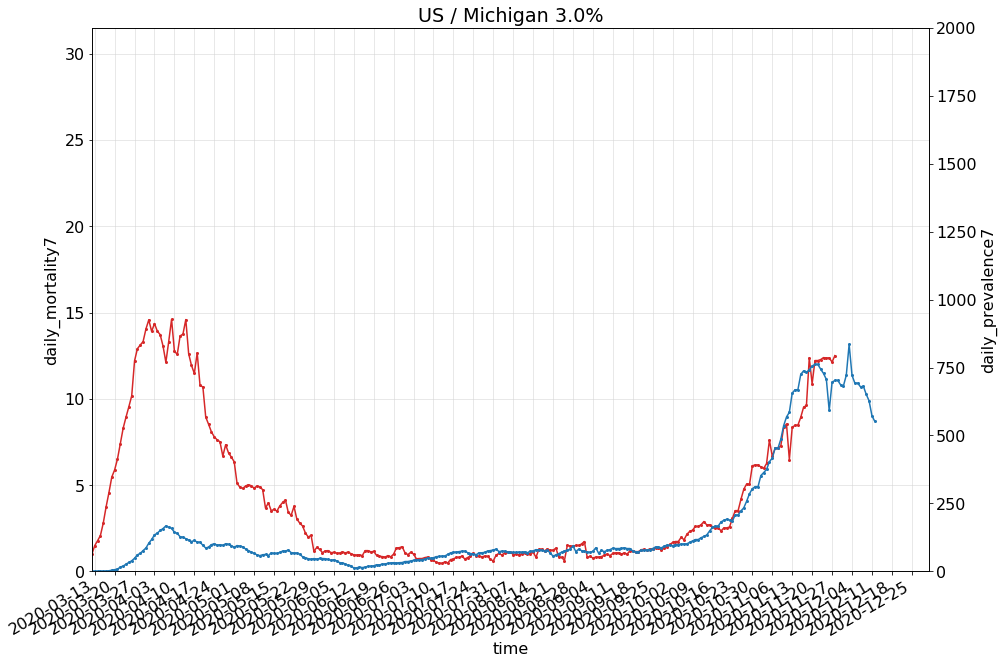

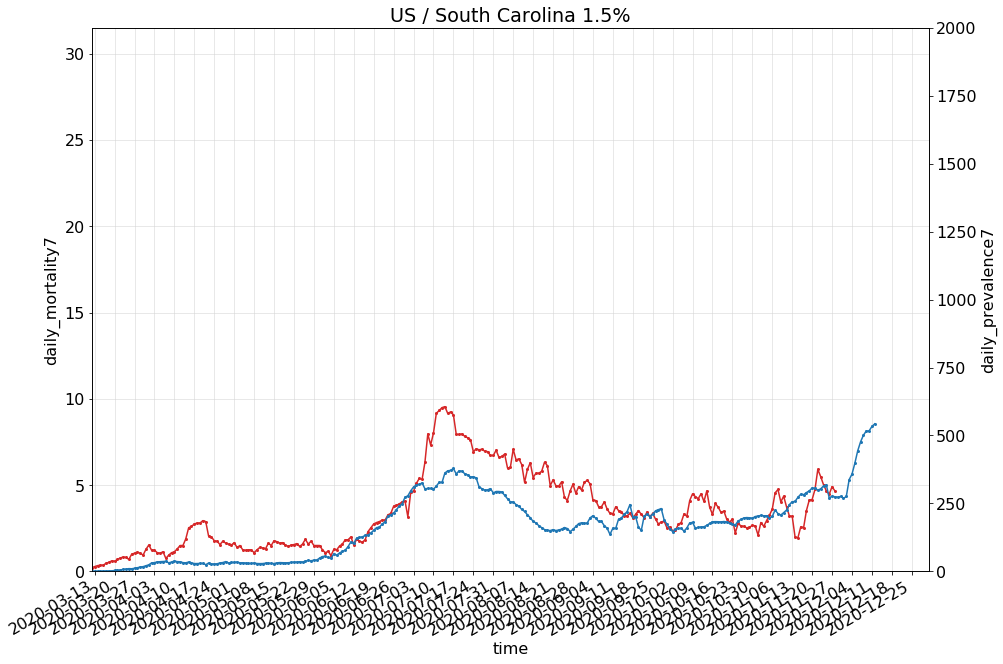

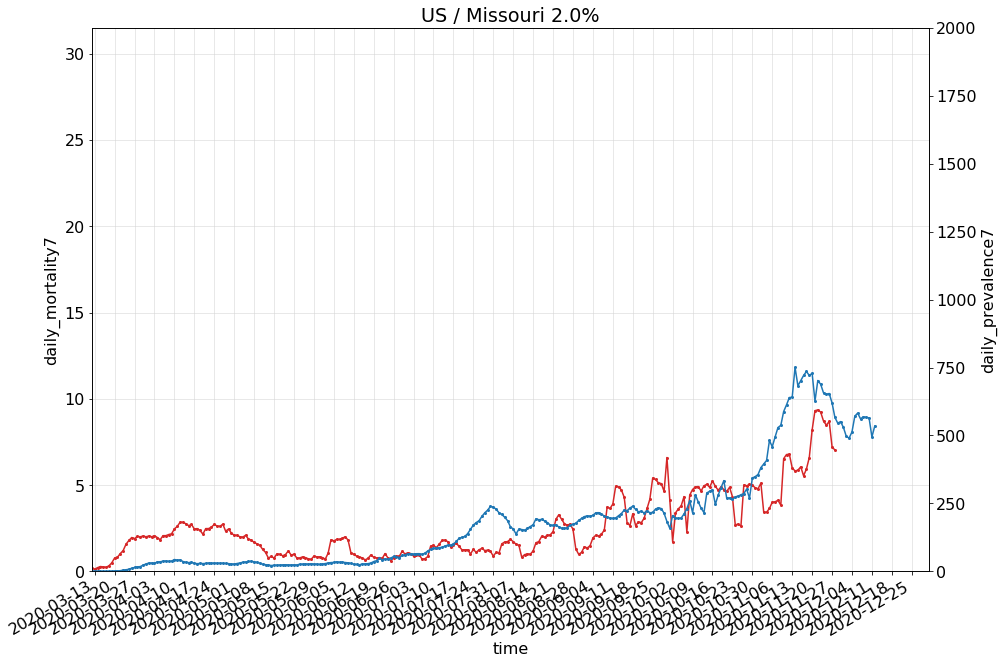

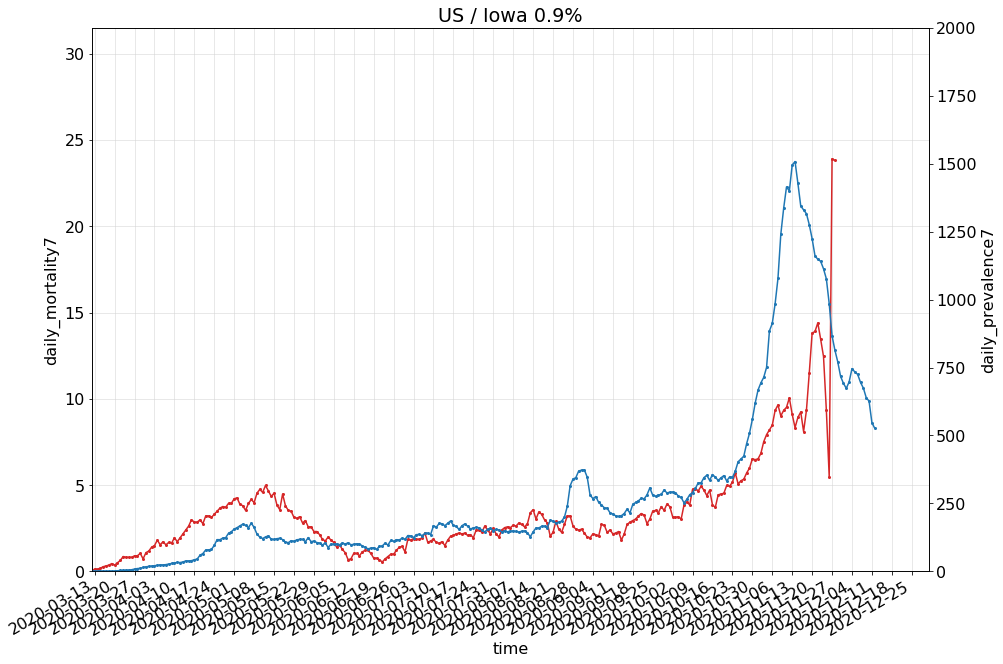

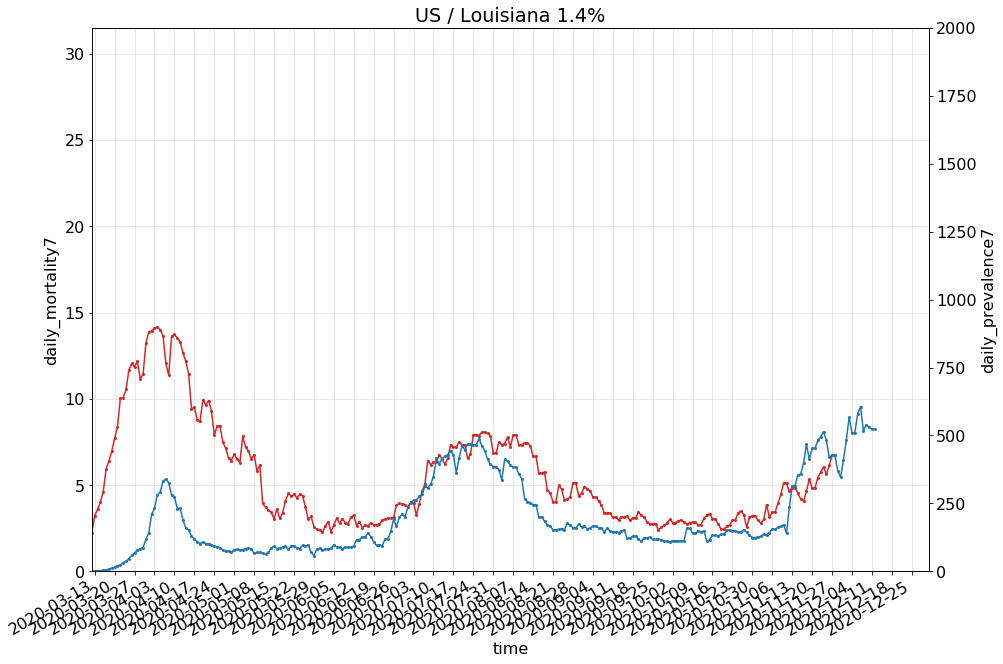

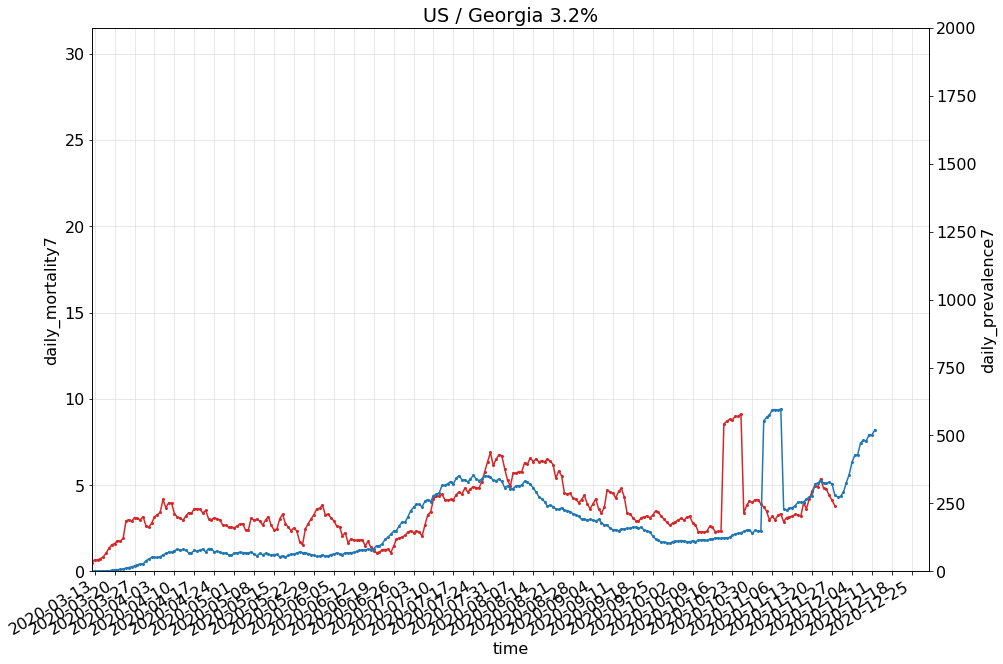

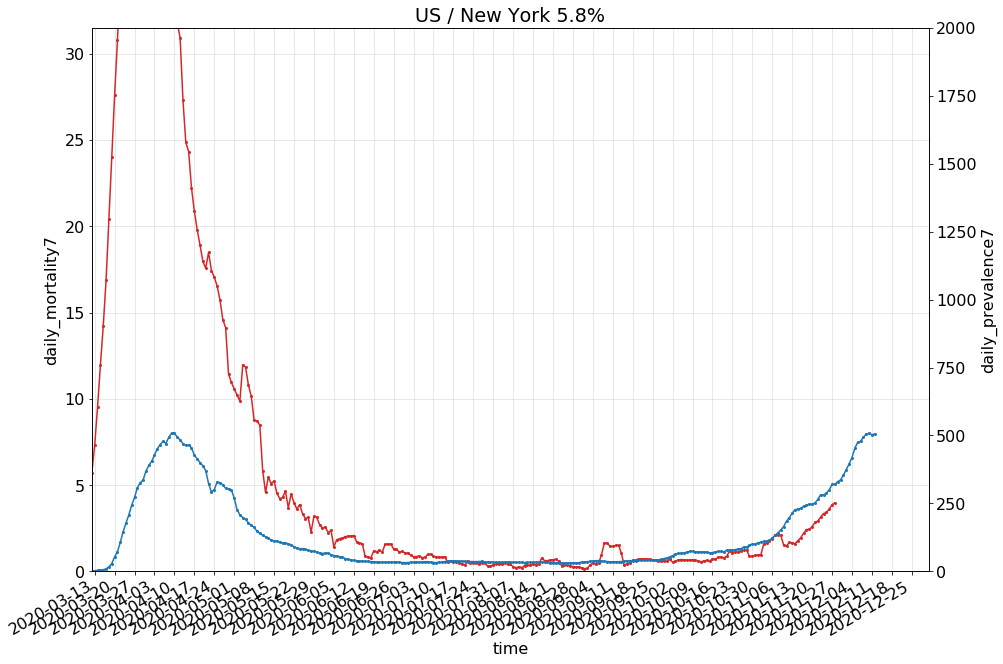

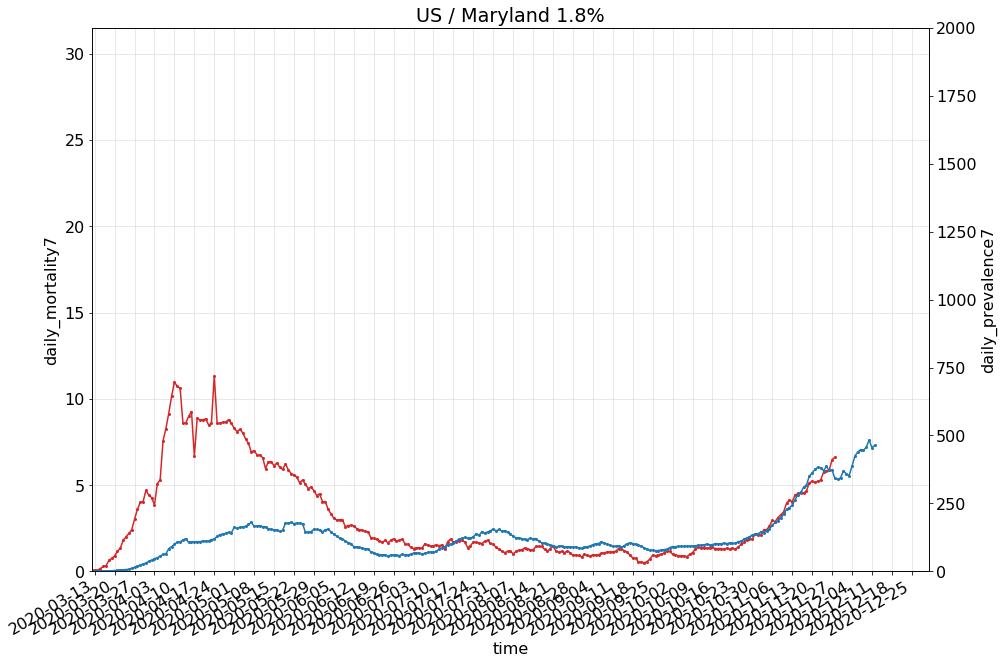

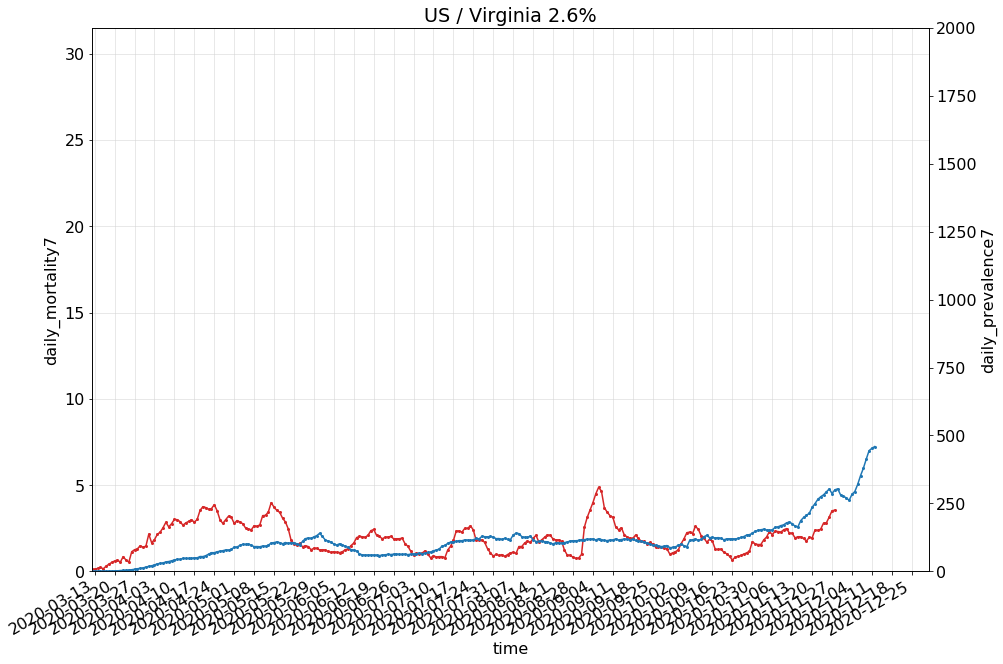

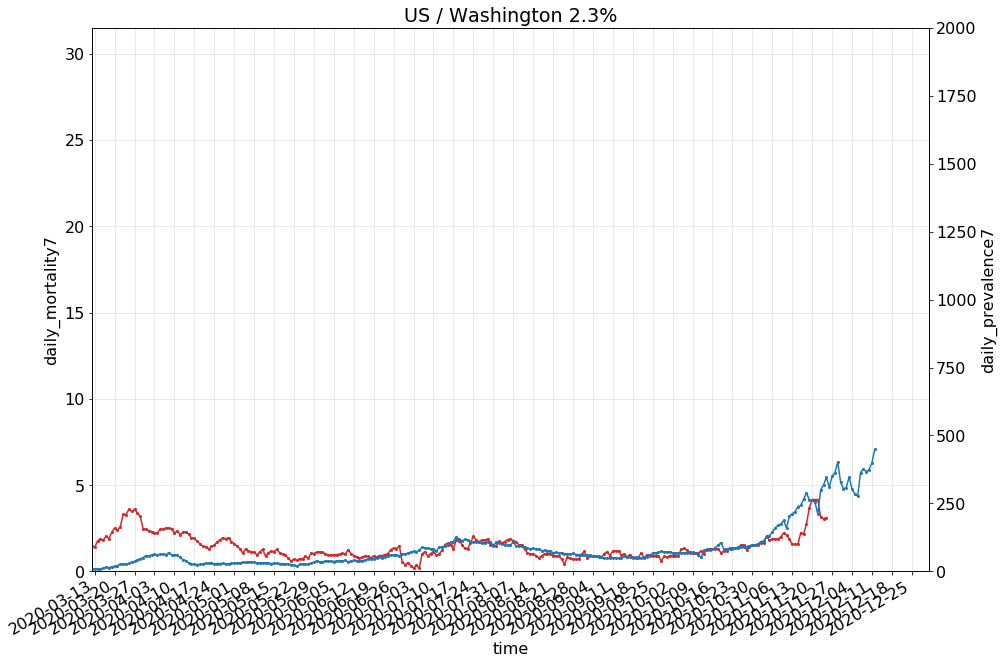

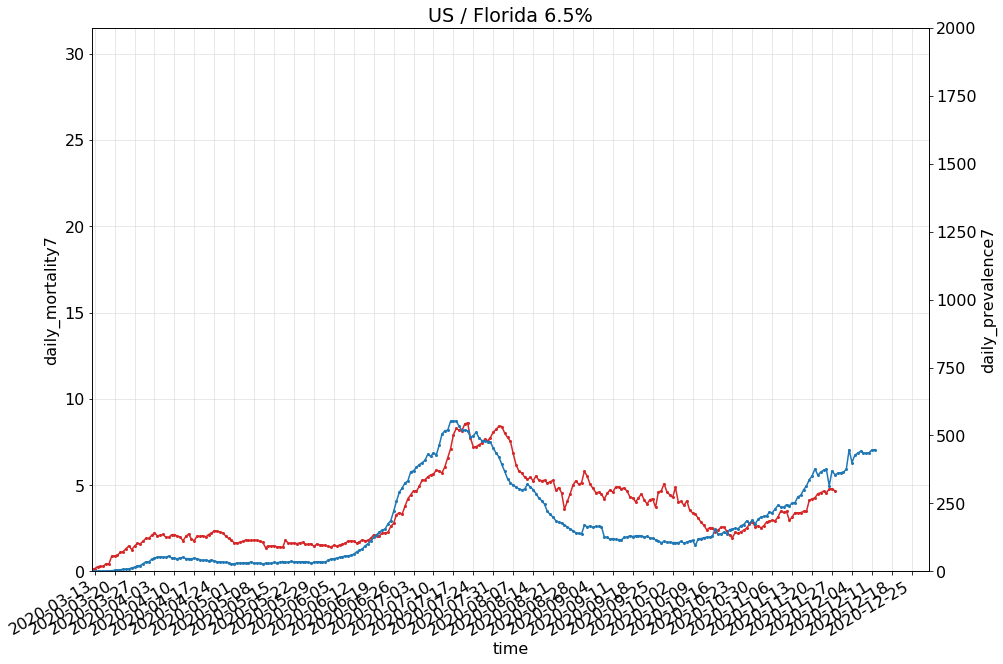

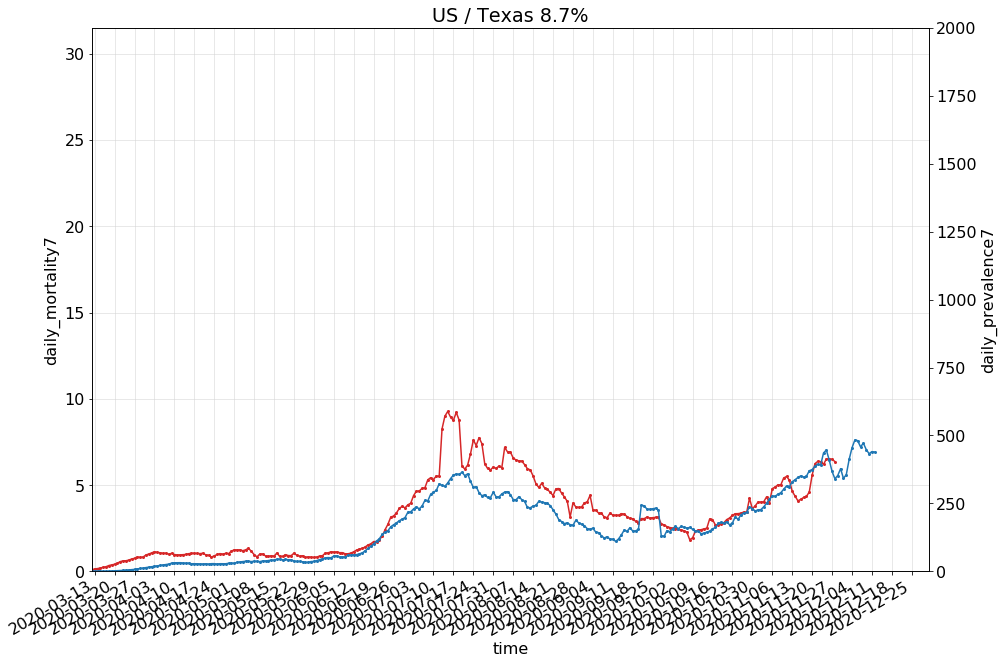

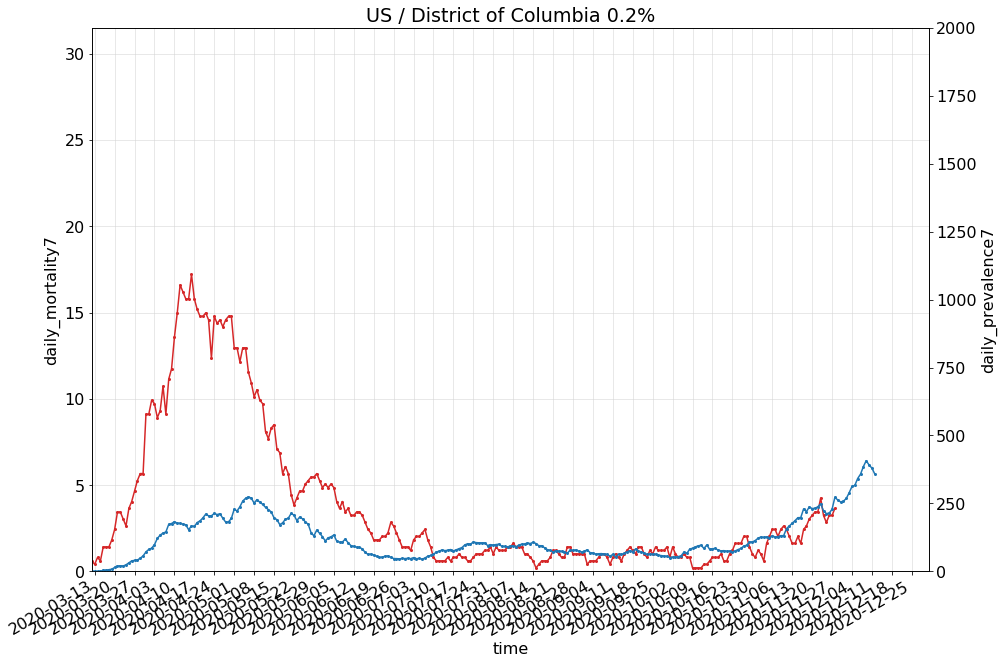

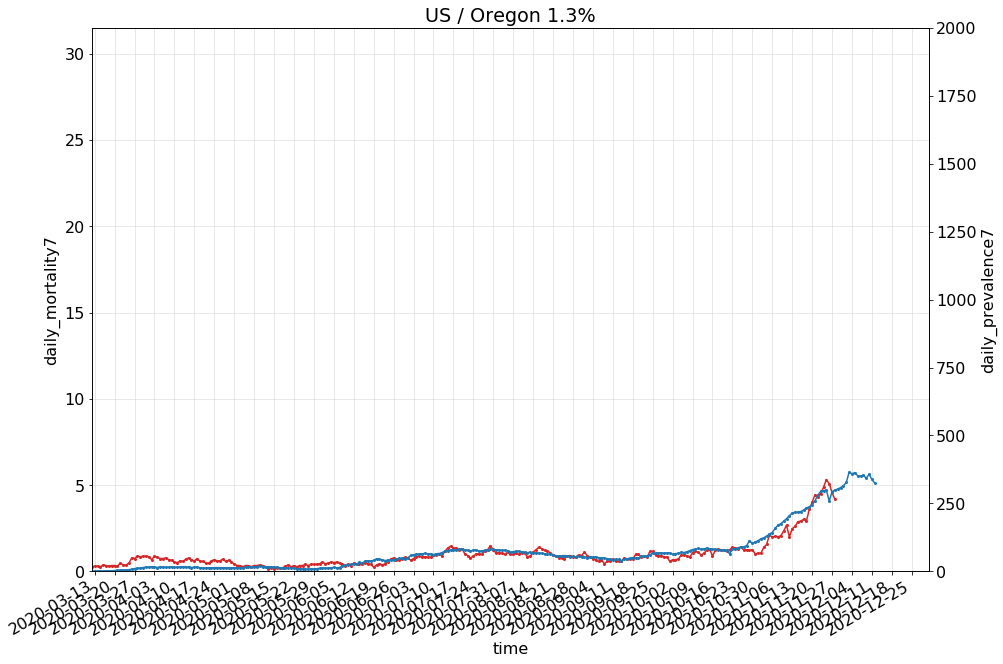

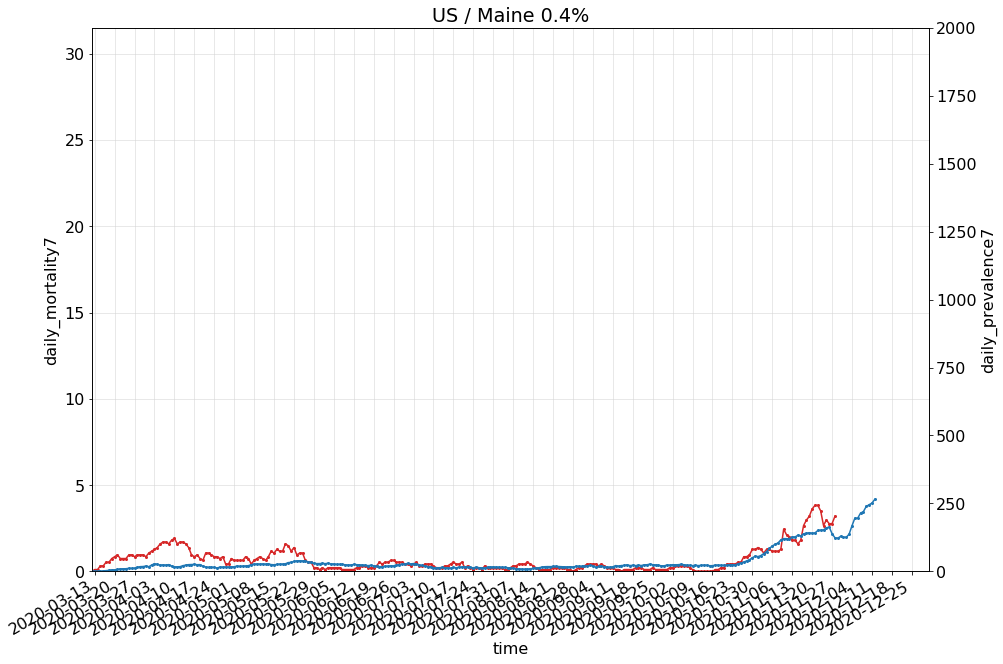

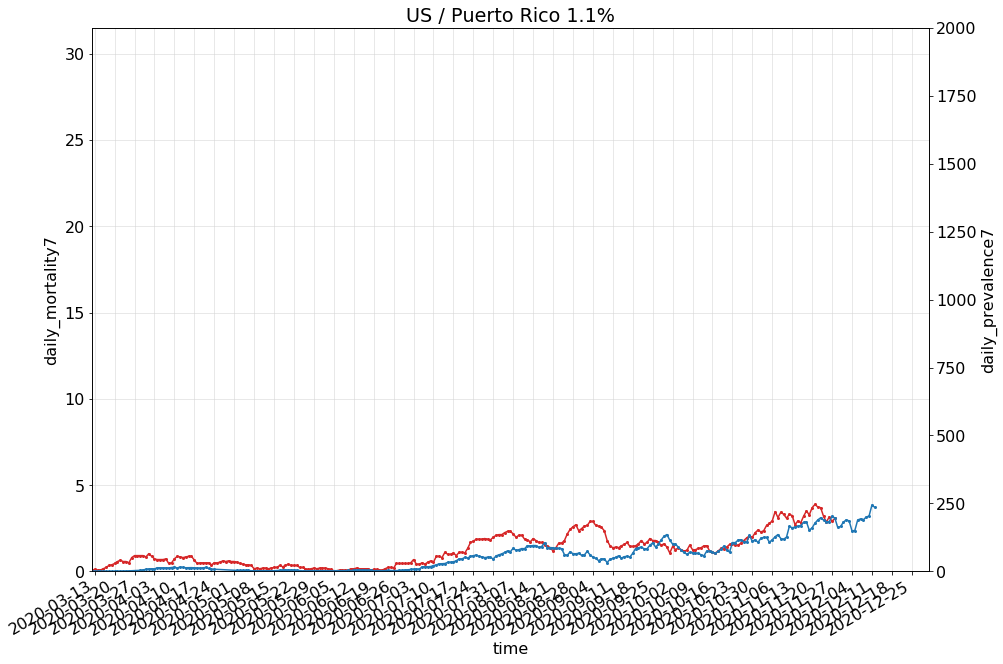

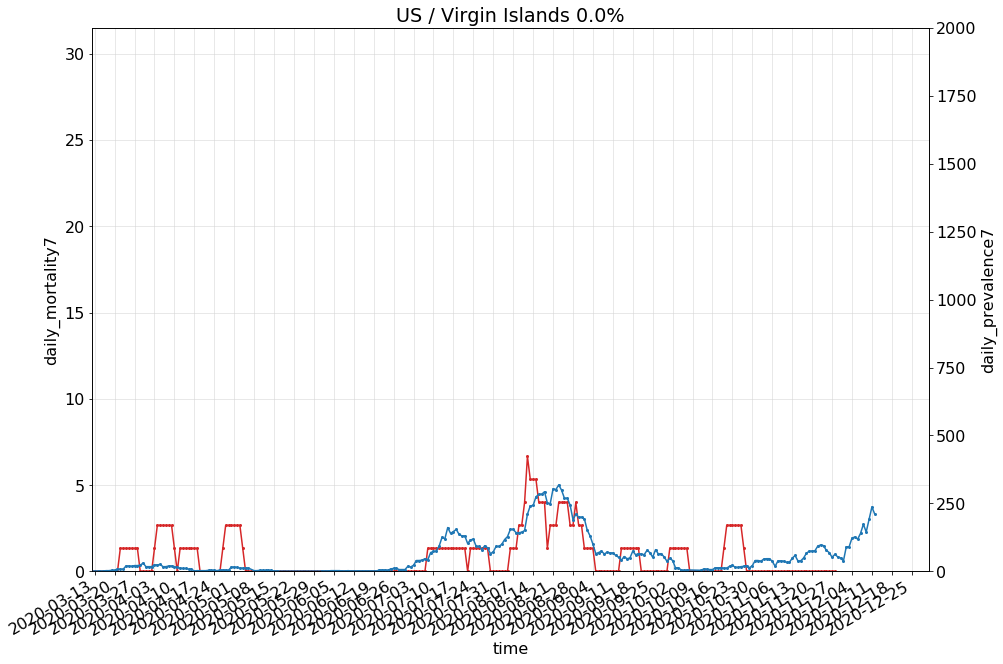

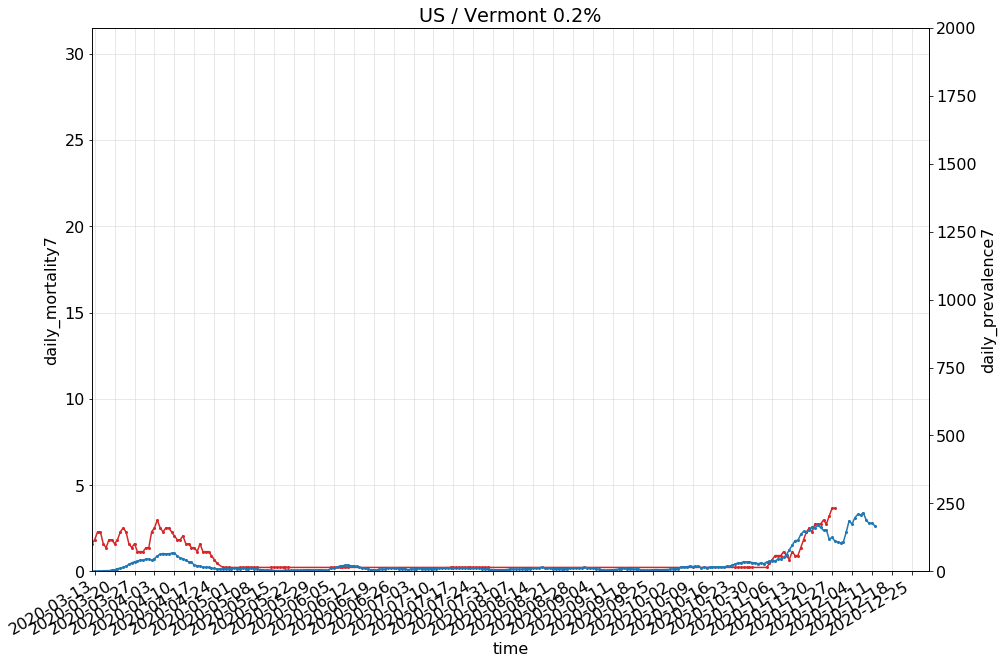

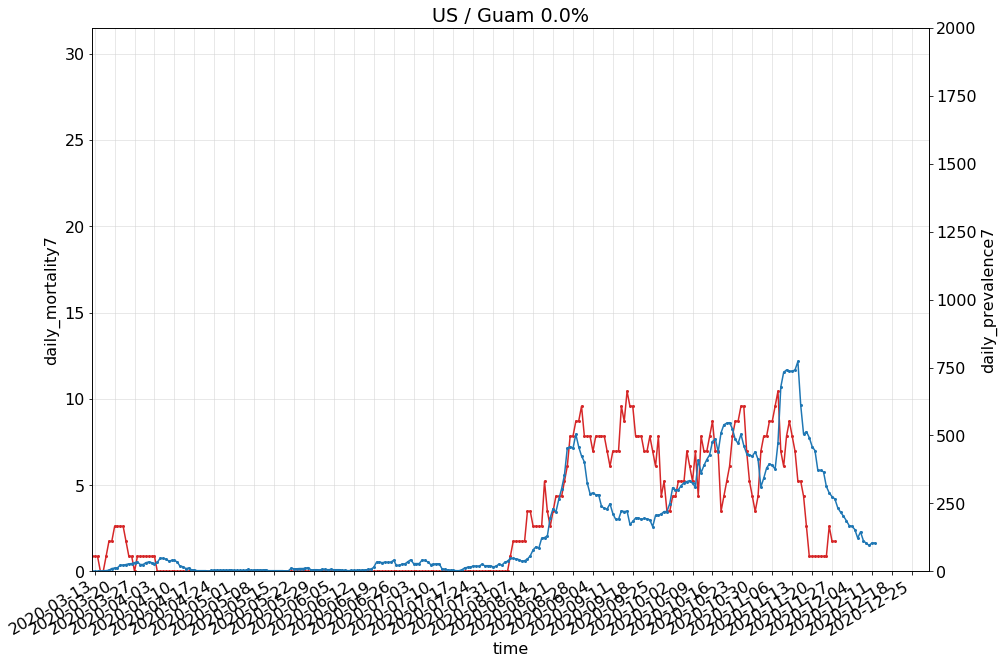

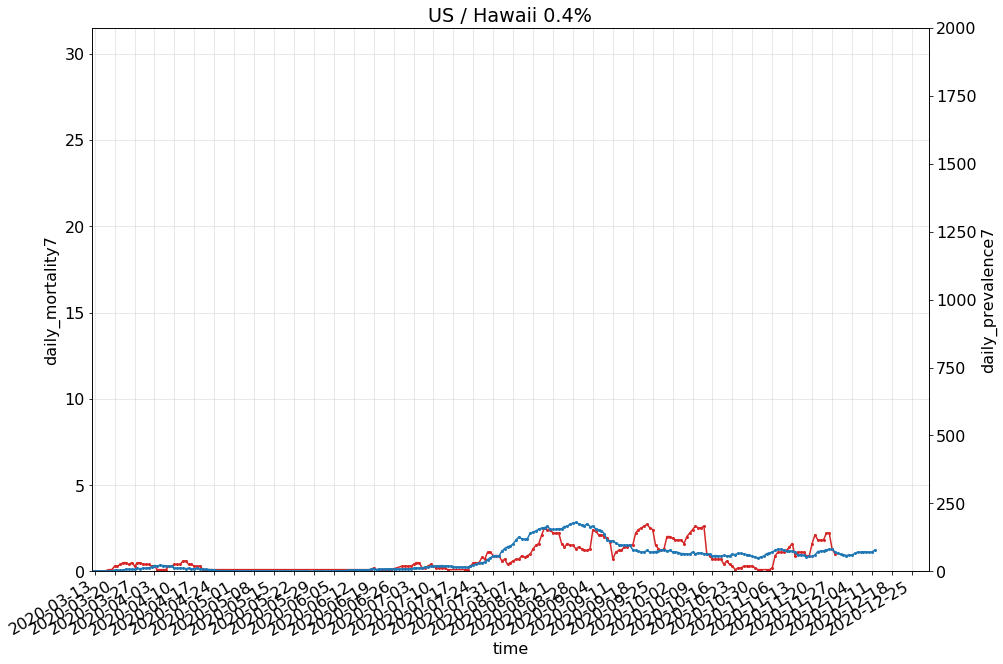

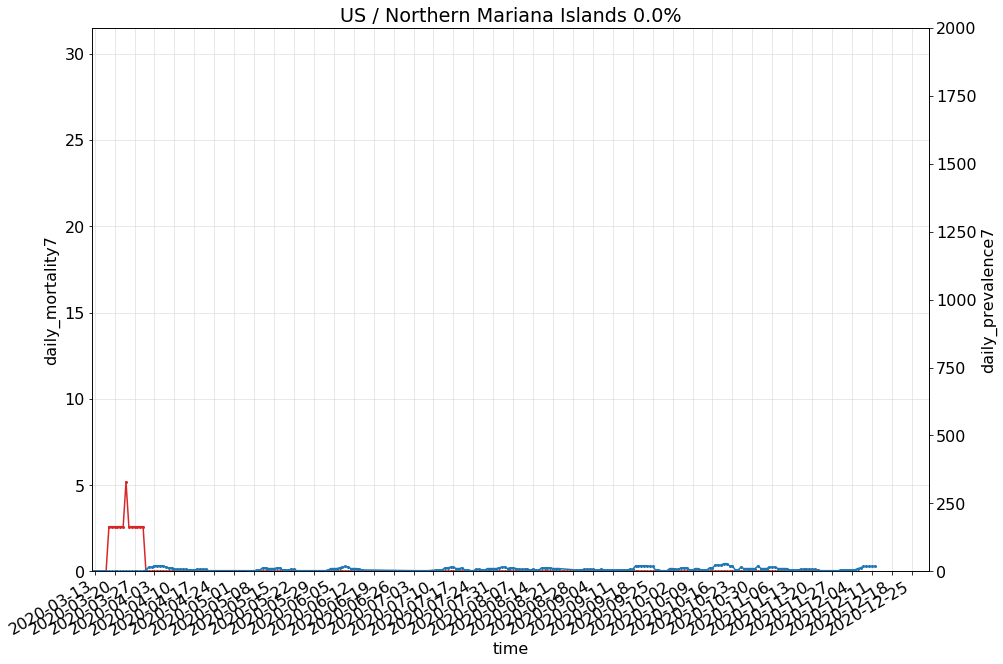

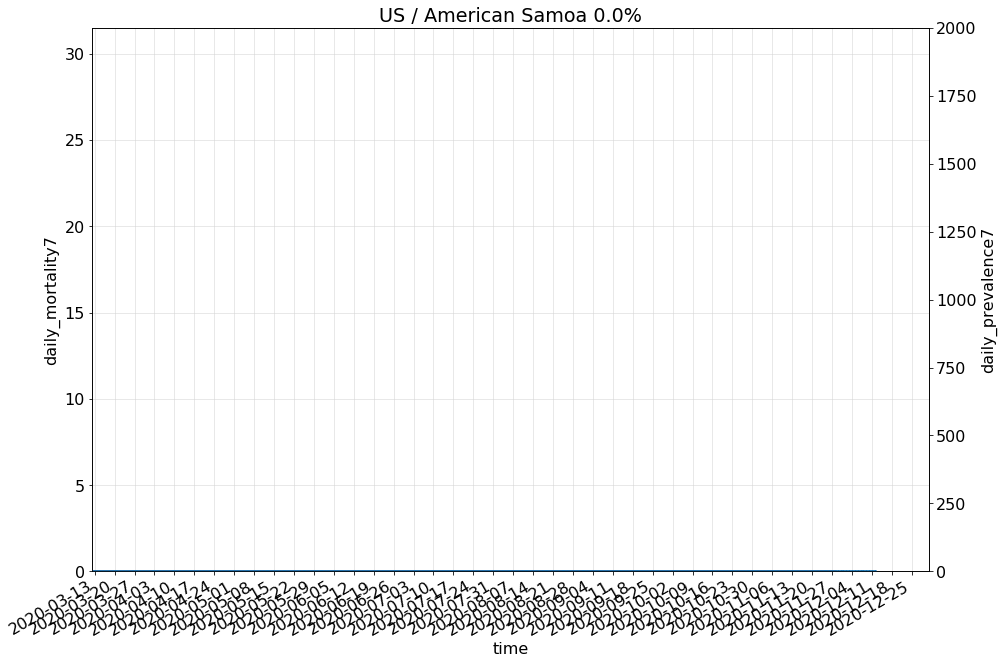

In [71]:
for region in STATES:
    if 'Princess' in region:
        continue
    _, ax1 = plt.subplots(subplot_kw={'xlim': XLIM})

    ax1.set_title(f'COVID-19 {region} - Linear scale')
    ax1.yaxis.tick_right()
    ax1.yaxis.grid(color='lightgrey', linewidth=0.5)
    ax1.xaxis.grid(color='lightgrey', linewidth=0.5)

    ds = ds_states.sel(location=region)

    ax2 = ax1.twinx()
    
    covid19.plot.plot_data(ax1, ds['daily_mortality7'], color=PALETTE_ONE[3], delay=-14)
    covid19.plot.plot_data(ax2, ds['daily_prevalence7'], color=PALETTE_ONE[0])

    ax1.set(ylim=(0, 2000. * 0.01575), title=f"{region} {ds['population'].values / usa['population'].values * 100:.1f}%")
    ax2.set(ylim=(0, 2000.), title=None)
